# Objetivo do Código
Este código demonstra a aplicação de técnicas de ciência de dados para simular carteiras de ações, separadas por setor de atuação, e comparar seus desempenhos com o índice Ibovespa nos últimos 3 anos.

# Metodologia

### Simulação simplificada: 
O modelo é simplificado, sem técnicas de alocação e otimização de carteiras.

### Posição fictícia: 
É utilizada uma posição fictícia de 1000 papéis por ativo para calcular o saldo total da carteira.

### Seleção de ativos: 
Não são utilizadas técnicas específicas de seleção dos ativos.

### Foco no aprendizado: 
O objetivo principal é aprofundar o uso da linguagem Python no mercado financeiro.


### Observação

Este projeto tem como foco o aprendizado e a aplicação de técnicas de Python no mercado financeiro.

In [446]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo as ações

In [421]:
# Define os setores e seus respectivos tickers
setores = {
    "Setor_Financeiro": ['ITUB4.SA', 'BBDC4.SA', 'SANB11.SA', 'BPAC11.SA', 'BBAS3.SA'],
    
    "Setor_Energia": ['CPLE6.SA', 'CMIG4.SA', 'TAEE11.SA', 'EGIE3.SA', 'CPFE3.SA'],
    
    "Setor_Consumo_Ciclico": ['JHSF3.SA', 'LREN3.SA', 'LEVE3.SA', 'RENT3.SA', 'YDUQ3.SA'],
    
    "Setor_Consumo_Nao_Ciclico": ['ABEV3.SA', 'BRFS3.SA', 'JBSS3.SA', 'SMTO3.SA', 'AGRO3.SA'],
    
    "Setor_Saude": ['ODPV3.SA', 'FLRY3.SA', 'HAPV3.SA', 'RADL3.SA', 'PNVL3.SA'],
    
    "Setor_Tecnologia": ['POSI3.SA', 'LWSA3.SA', 'TOTS3.SA', 'MLAS3.SA', 'SEQL3.SA'],
    
    "Setor_Materiais_Basicos": ['VALE3.SA', 'CSNA3.SA', 'GGBR4.SA', 'GOAU4.SA', 'SUZB3.SA'],
    
    "Setor_Petroleo_Gas_Biocombustiveis": ['PETR4.SA', 'PRIO3.SA', 'RECV3.SA', 'VBBR3.SA', 'BRAV3.SA'],
    
    "Setor_Telecomunicacoes": ['TIMS3.SA', 'VIVT3.SA', 'OIBR3.SA', 'TELB4.SA', 'INTB3.SA'],
    
    "Setor_Transportes_Logistica": ['RAIL3.SA', 'CCRO3.SA', 'LOGG3.SA', 'JSLG3.SA', 'TASA4.SA']
}

In [422]:
type(setores)

dict

# Definindo as Carteiras e extraindo as cotações

In [423]:
# Dicionário para armazenar os DataFrames de cada setor
dados_setores = {}

In [424]:
# Loop para baixar os dados de cada setor
for setor, tickers in setores.items():
    df_setor = pd.DataFrame()  # Inicializa um DataFrame para o setor
    
    for ticker in tickers:
        print(f"Baixando dados para {ticker}...")  # Mensagem de progresso
        dados_precos = yf.download(ticker, period="3y")
        dados_precos['Ticker'] = ticker  # Adiciona a coluna do ticker
        df_setor = pd.concat([df_setor, dados_precos])
    
    dados_setores[setor] = df_setor  # Armazena o DataFrame no dicionário

# Agora, cada setor tem seu próprio DataFrame dentro do dicionário `dados_setores`

Baixando dados para ITUB4.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para BBDC4.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para SANB11.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para BPAC11.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para BBAS3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para CPLE6.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para CMIG4.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para TAEE11.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para EGIE3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para CPFE3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para JHSF3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para LREN3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para LEVE3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para RENT3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para YDUQ3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para ABEV3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para BRFS3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para JBSS3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para SMTO3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para AGRO3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para ODPV3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para FLRY3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para HAPV3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para RADL3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para PNVL3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para POSI3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para LWSA3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para TOTS3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para MLAS3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para SEQL3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para VALE3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para CSNA3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para GGBR4.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para GOAU4.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para SUZB3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para PETR4.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para PRIO3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para RECV3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para VBBR3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para BRAV3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para TIMS3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para VIVT3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para OIBR3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para TELB4.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para INTB3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para RAIL3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para CCRO3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para LOGG3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para JSLG3.SA...


[*********************100%%**********************]  1 of 1 completed


Baixando dados para TASA4.SA...


[*********************100%%**********************]  1 of 1 completed


In [425]:
IBovespa = yf.download('^BVSP', period="3y")

[*********************100%%**********************]  1 of 1 completed


# Exibindo as carteiras

In [426]:
IBovespa

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-01-31  111910.0  112495.0  111195.0  112388.0   112388.0  12190800
2022-02-01  112143.0  113302.0  112135.0  113147.0   113147.0  11133300
2022-02-02  113228.0  113666.0  111645.0  112161.0   112161.0  11751200
2022-02-03  111897.0  112502.0  111225.0  111696.0   111696.0  11039700
2022-02-04  111696.0  112415.0  110321.0  112245.0   112245.0         0
...              ...       ...       ...       ...        ...       ...
2025-01-27  122443.0  124862.0  122207.0  124862.0   124862.0  11021500
2025-01-28  124861.0  124881.0  123973.0  124056.0   124056.0   8313500
2025-01-29  124056.0  124767.0  123278.0  123432.0   123432.0   7348500
2025-01-30  123433.0  127169.0  123432.0  126913.0   126913.0  11688100
2025-01-31  126914.0  127532.0  126057.0  126135.0   126135.0  10242600

[751 rows x 6 columns]

In [427]:
dados_setores["Setor_Financeiro"]

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2022-01-31  24.670000  25.510000  24.520000  25.330000  21.666388  44244800   
2022-02-01  25.290001  25.690001  25.180000  25.490000  21.818438  28772200   
2022-02-02  25.469999  25.510000  24.920000  25.090000  21.476061  34506100   
2022-02-03  25.200001  25.530001  24.709999  25.379999  21.724287  41713800   
2022-02-04  25.240000  25.760000  25.200001  25.459999  21.792768  34593900   
...               ...        ...        ...        ...        ...       ...   
2025-01-27  26.570000  27.709999  26.549999  27.709999  27.709999  21719600   
2025-01-28  27.690001  27.700001  27.320000  27.530001  27.530001  13016900   
2025-01-29  27.600000  27.750000  27.350000  27.440001  27.440001  11592900   
2025-01-30  27.370001  27.940001  27.280001  27.639999  27.639999  22311000   
2025-01-31  27.740000  28.000000  27.660000  27.680000  27.680000  19675000   

              Ticker  
Date                  
2022-01-31  ITUB4.SA  
2022-02-01  ITUB4.SA  
2022-02-02  ITUB4.SA  
2022-02-03  ITUB4.SA  
2022-02-04  ITUB4.SA  
...              ...  
2025-01-27  BBAS3.SA  
2025-01-28  BBAS3.SA  
2025-01-29  BBAS3.SA  
2025-01-30  BBAS3.SA  
2025-01-31  BBAS3.SA  

[3755 rows x 7 columns]

In [428]:
dados_setores["Setor_Energia"]


Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2022-01-31   7.108003   7.247964   7.078012   7.177983   5.898154   9594493   
2022-02-01   7.177983   7.257961   7.147992   7.187981   5.906369  12776587   
2022-02-02   7.197978   7.287953   7.088009   7.098006   5.832436   8933608   
2022-02-03   7.118000   7.287953   7.108003   7.257961   5.963871   8443170   
2022-02-04   7.247964   7.327941   7.177983   7.227969   5.939228  11231253   
...               ...        ...        ...        ...        ...       ...   
2025-01-27  32.900002  33.820000  32.849998  33.820000  33.820000   1717800   
2025-01-28  33.799999  34.160000  33.509998  33.959999  33.959999   1817600   
2025-01-29  34.000000  34.169998  33.509998  33.700001  33.700001    933500   
2025-01-30  33.869999  34.480000  33.580002  34.419998  34.419998   1675500   
2025-01-31  34.490002  34.669998  34.189999  34.380001  34.380001   1360600   

              Ticker  
Date                  
2022-01-31  CPLE6.SA  
2022-02-01  CPLE6.SA  
2022-02-02  CPLE6.SA  
2022-02-03  CPLE6.SA  
2022-02-04  CPLE6.SA  
...              ...  
2025-01-27  CPFE3.SA  
2025-01-28  CPFE3.SA  
2025-01-29  CPFE3.SA  
2025-01-30  CPFE3.SA  
2025-01-31  CPFE3.SA  

[3755 rows x 7 columns]

In [429]:
dados_setores["Setor_Consumo_Ciclico"]

Open   High    Low  Close  Adj Close   Volume    Ticker
Date                                                                
2022-01-31   6.20   6.43   6.15   6.43   5.048979  5188300  JHSF3.SA
2022-02-01   6.43   6.47   6.22   6.26   4.915492  6137700  JHSF3.SA
2022-02-02   6.27   6.44   6.15   6.16   4.836969  5575800  JHSF3.SA
2022-02-03   6.11   6.35   6.02   6.23   4.891934  6776400  JHSF3.SA
2022-02-04   6.21   6.23   5.84   5.95   4.672072  4827800  JHSF3.SA
...           ...    ...    ...    ...        ...      ...       ...
2025-01-27   9.00   9.56   8.84   9.55   9.550000  6568300  YDUQ3.SA
2025-01-28   9.42   9.52   9.21   9.30   9.300000  3135100  YDUQ3.SA
2025-01-29   9.38   9.51   9.27   9.43   9.430000  2360800  YDUQ3.SA
2025-01-30   9.51  10.50   9.51  10.36  10.360000  7240600  YDUQ3.SA
2025-01-31  10.30  10.48  10.05  10.25  10.250000  4646200  YDUQ3.SA

[3755 rows x 7 columns]

In [430]:
dados_setores["Setor_Consumo_Nao_Ciclico"]

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                      
2022-01-31  14.90  15.120000  14.770000  14.970000  12.808363  21318000   
2022-02-01  14.94  15.130000  14.790000  14.850000  12.705690  14112500   
2022-02-02  14.85  14.940000  14.450000  14.520000  12.423343  17975400   
2022-02-03  14.54  14.620000  14.420000  14.460000  12.372005  13206600   
2022-02-04  14.42  14.540000  14.170000  14.410000  12.329226  18251100   
...           ...        ...        ...        ...        ...       ...   
2025-01-27  22.26  22.799999  22.139999  22.590000  22.590000    240200   
2025-01-28  22.59  22.799999  22.540001  22.790001  22.790001    127600   
2025-01-29  22.67  22.900000  22.450001  22.450001  22.450001    120000   
2025-01-30  22.57  23.049999  22.570000  23.049999  23.049999    200200   
2025-01-31  23.10  23.180000  22.639999  22.670000  22.670000    226400   

              Ticker  
Date                  
2022-01-31  ABEV3.SA  
2022-02-01  ABEV3.SA  
2022-02-02  ABEV3.SA  
2022-02-03  ABEV3.SA  
2022-02-04  ABEV3.SA  
...              ...  
2025-01-27  AGRO3.SA  
2025-01-28  AGRO3.SA  
2025-01-29  AGRO3.SA  
2025-01-30  AGRO3.SA  
2025-01-31  AGRO3.SA  

[3755 rows x 7 columns]

In [431]:
dados_setores["Setor_Saude"]

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2022-01-31  11.327272  11.509090  11.190909  11.345454   9.814856  1620080   
2022-02-01  11.345454  11.463636  11.072727  11.254545   9.736211  1760440   
2022-02-02  11.245454  11.436363  11.227272  11.336363   9.806992  2462790   
2022-02-03  11.309090  11.400000  10.963636  11.090909   9.594651  1302070   
2022-02-04  11.136363  11.136363  10.827272  11.100000   9.602515  1065240   
...               ...        ...        ...        ...        ...      ...   
2025-01-27   8.210000   8.340000   8.180000   8.310000   8.310000   514600   
2025-01-28   8.280000   8.280000   8.120000   8.170000   8.170000   234200   
2025-01-29   8.110000   8.550000   8.100000   8.320000   8.320000   437400   
2025-01-30   8.320000   8.610000   8.310000   8.510000   8.510000   488000   
2025-01-31   8.570000   8.590000   8.290000   8.300000   8.300000   414100   

              Ticker  
Date                  
2022-01-31  ODPV3.SA  
2022-02-01  ODPV3.SA  
2022-02-02  ODPV3.SA  
2022-02-03  ODPV3.SA  
2022-02-04  ODPV3.SA  
...              ...  
2025-01-27  PNVL3.SA  
2025-01-28  PNVL3.SA  
2025-01-29  PNVL3.SA  
2025-01-30  PNVL3.SA  
2025-01-31  PNVL3.SA  

[3755 rows x 7 columns]

In [432]:
dados_setores["Setor_Tecnologia"]

Open  High   Low  Close  Adj Close   Volume    Ticker
Date                                                             
2022-01-31  9.07  9.45  9.03   9.36   7.596272  2554800  POSI3.SA
2022-02-01  9.44  9.56  9.09   9.25   7.507000  2813000  POSI3.SA
2022-02-02  9.32  9.73  9.27   9.58   7.774817  4022400  POSI3.SA
2022-02-03  9.53  9.65  9.11   9.17   7.442074  2959700  POSI3.SA
2022-02-04  9.20  9.23  8.82   9.00   7.304109  2271400  POSI3.SA
...          ...   ...   ...    ...        ...      ...       ...
2025-01-27  2.66  2.86  2.63   2.86   2.860000  1002400  SEQL3.SA
2025-01-28  2.83  3.06  2.79   2.90   2.900000  1050500  SEQL3.SA
2025-01-29  2.92  2.98  2.62   2.65   2.650000  1181000  SEQL3.SA
2025-01-30  2.68  2.73  2.64   2.65   2.650000   598100  SEQL3.SA
2025-01-31  2.69  2.78  2.63   2.65   2.650000   973000  SEQL3.SA

[3755 rows x 7 columns]

In [433]:
dados_setores["Setor_Materiais_Basicos"]

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2022-01-31  82.940002  82.940002  80.870003  80.870003  63.518940  31397700   
2022-02-01  81.500000  85.330002  81.370003  85.309998  67.006325  24131300   
2022-02-02  85.500000  86.290001  84.720001  85.790001  67.383324  17489000   
2022-02-03  86.300003  86.779999  85.320000  85.750000  67.351913  19179400   
2022-02-04  85.750000  88.169998  85.550003  88.000000  69.119164  24535400   
...               ...        ...        ...        ...        ...       ...   
2025-01-27  62.759998  63.400002  62.349998  63.090000  63.090000   4296900   
2025-01-28  62.709999  63.389999  62.310001  62.759998  62.759998   2937100   
2025-01-29  63.070000  63.320000  62.110001  62.200001  62.200001   4256300   
2025-01-30  62.560001  62.970001  61.860001  62.360001  62.360001   4598900   
2025-01-31  62.570000  62.820000  61.830002  62.369999  62.369999   4468900   

              Ticker  
Date                  
2022-01-31  VALE3.SA  
2022-02-01  VALE3.SA  
2022-02-02  VALE3.SA  
2022-02-03  VALE3.SA  
2022-02-04  VALE3.SA  
...              ...  
2025-01-27  SUZB3.SA  
2025-01-28  SUZB3.SA  
2025-01-29  SUZB3.SA  
2025-01-30  SUZB3.SA  
2025-01-31  SUZB3.SA  

[3755 rows x 7 columns]

In [434]:
dados_setores["Setor_Petroleo_Gas_Biocombustiveis"]

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2022-01-31  32.500000  33.000000  32.070000  32.349998  12.766789  62450300   
2022-02-01  32.349998  33.320000  31.950001  33.000000  13.023311  57315200   
2022-02-02  33.410000  33.490002  32.360001  32.520000  12.833879  36271700   
2022-02-03  32.349998  32.919998  31.620001  32.070000  12.656289  51087800   
2022-02-04  32.410000  33.230000  31.879999  32.630001  12.877292  59346800   
...               ...        ...        ...        ...        ...       ...   
2025-01-27  22.379999  23.600000  22.240000  22.740000  22.740000   6930700   
2025-01-28  23.010000  23.049999  22.219999  22.440001  22.440001   5261800   
2025-01-29  22.480000  22.500000  21.889999  21.889999  21.889999   5502100   
2025-01-30  22.049999  22.490000  21.770000  22.260000  22.260000   8418500   
2025-01-31  22.330000  23.650000  22.110001  22.430000  22.430000  21079000   

              Ticker  
Date                  
2022-01-31  PETR4.SA  
2022-02-01  PETR4.SA  
2022-02-02  PETR4.SA  
2022-02-03  PETR4.SA  
2022-02-04  PETR4.SA  
...              ...  
2025-01-27  BRAV3.SA  
2025-01-28  BRAV3.SA  
2025-01-29  BRAV3.SA  
2025-01-30  BRAV3.SA  
2025-01-31  BRAV3.SA  

[3108 rows x 7 columns]

In [435]:
dados_setores["Setor_Telecomunicacoes"]

Open   High    Low  Close  Adj Close    Volume    Ticker
Date                                                                 
2022-01-31  13.00  13.40  12.92  13.27  11.147140  10110900  TIMS3.SA
2022-02-01  13.38  13.54  13.01  13.19  11.079937   8627700  TIMS3.SA
2022-02-02  13.13  13.20  13.02  13.14  11.037936   3630000  TIMS3.SA
2022-02-03  13.05  13.54  13.05  13.44  11.289943   6519300  TIMS3.SA
2022-02-04  13.56  13.56  13.14  13.31  11.180740   3370700  TIMS3.SA
...           ...    ...    ...    ...        ...       ...       ...
2025-01-27  13.47  13.85  13.39  13.77  13.770000   1921300  INTB3.SA
2025-01-28  13.77  13.78  13.24  13.39  13.390000   1986200  INTB3.SA
2025-01-29  13.38  13.91  13.36  13.65  13.650000   1633700  INTB3.SA
2025-01-30  13.81  14.67  13.68  14.48  14.480000   2774100  INTB3.SA
2025-01-31  14.47  14.65  14.34  14.34  14.340000   1523900  INTB3.SA

[3755 rows x 7 columns]

In [436]:
dados_setores["Setor_Transportes_Logistica"]

Open   High    Low  Close  Adj Close    Volume    Ticker
Date                                                                 
2022-01-31  15.78  15.95  15.41  15.62  15.478319  16527300  RAIL3.SA
2022-02-01  15.76  15.88  15.19  15.51  15.369317  14263500  RAIL3.SA
2022-02-02  15.51  15.81  15.43  15.45  15.309861   4907700  RAIL3.SA
2022-02-03  15.52  15.66  15.02  15.22  15.081946  10535400  RAIL3.SA
2022-02-04  15.19  15.26  14.79  15.26  15.121585  19246400  RAIL3.SA
...           ...    ...    ...    ...        ...       ...       ...
2025-01-27   7.97   8.17   7.93   8.06   8.060000    224900  TASA4.SA
2025-01-28   8.08   8.13   7.96   7.99   7.990000    225000  TASA4.SA
2025-01-29   7.99   8.05   7.94   7.99   7.990000    218000  TASA4.SA
2025-01-30   7.99   8.09   7.97   8.06   8.060000    221600  TASA4.SA
2025-01-31   8.05   8.13   8.03   8.06   8.060000    201200  TASA4.SA

[3755 rows x 7 columns]

# Visualizando as cotações de cada cada ação por carteira

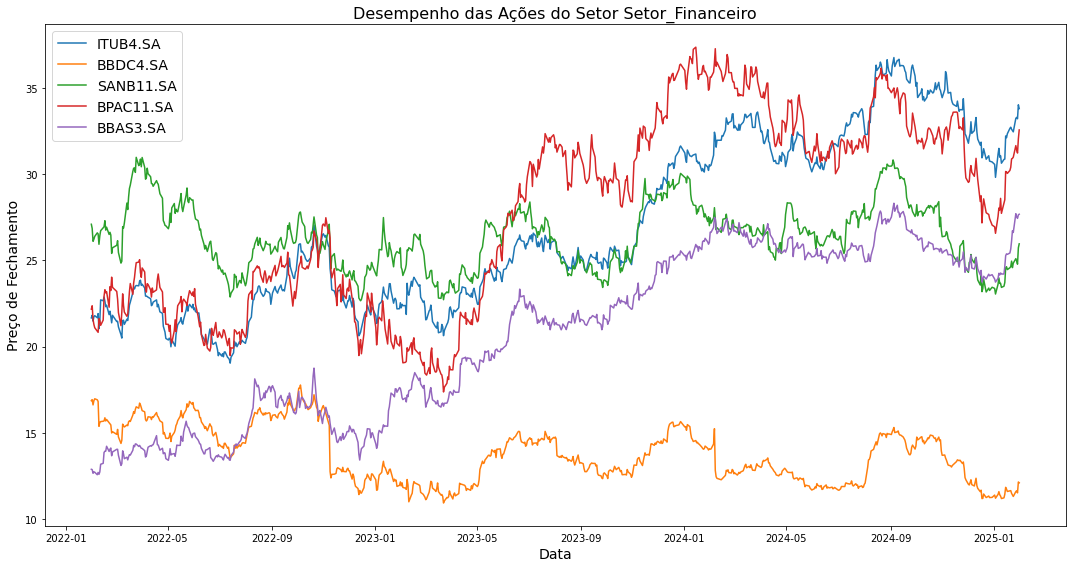

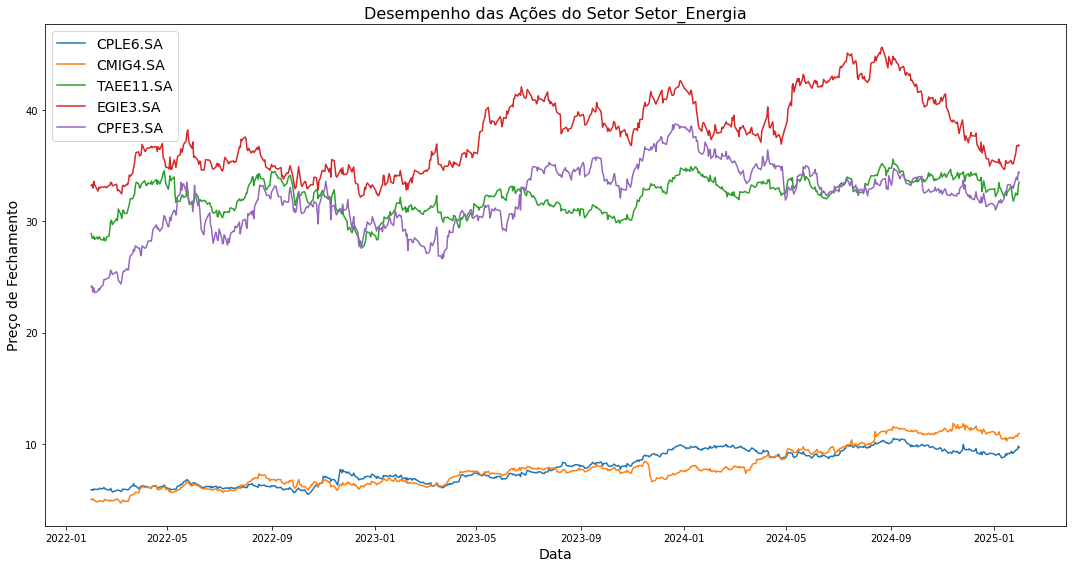

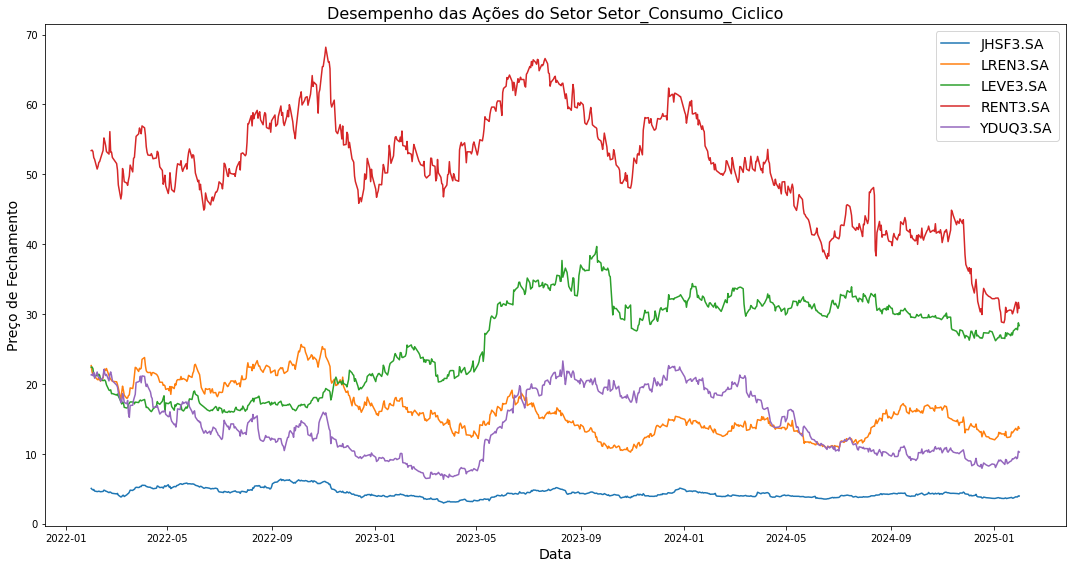

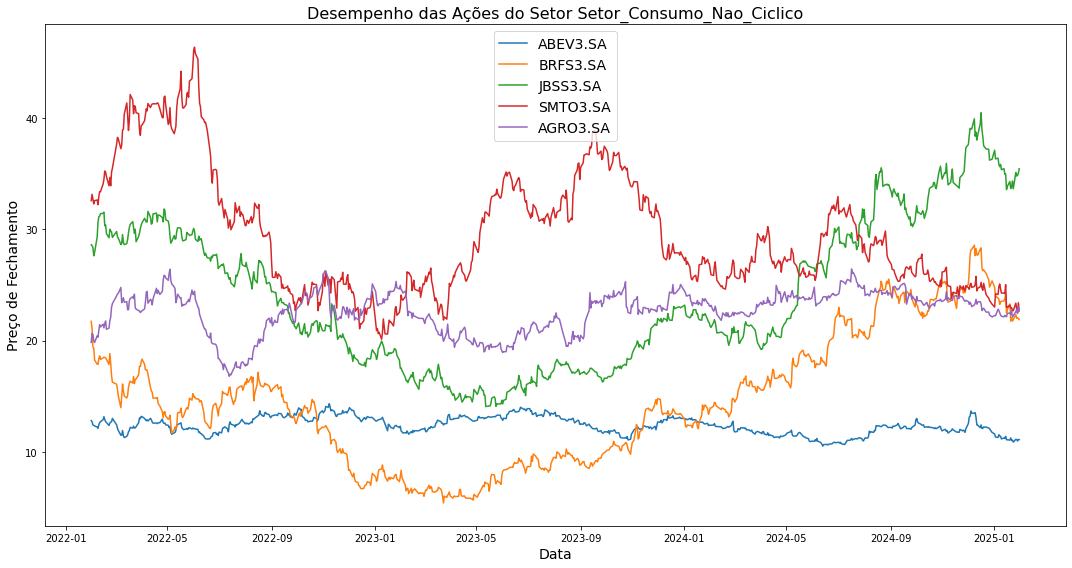

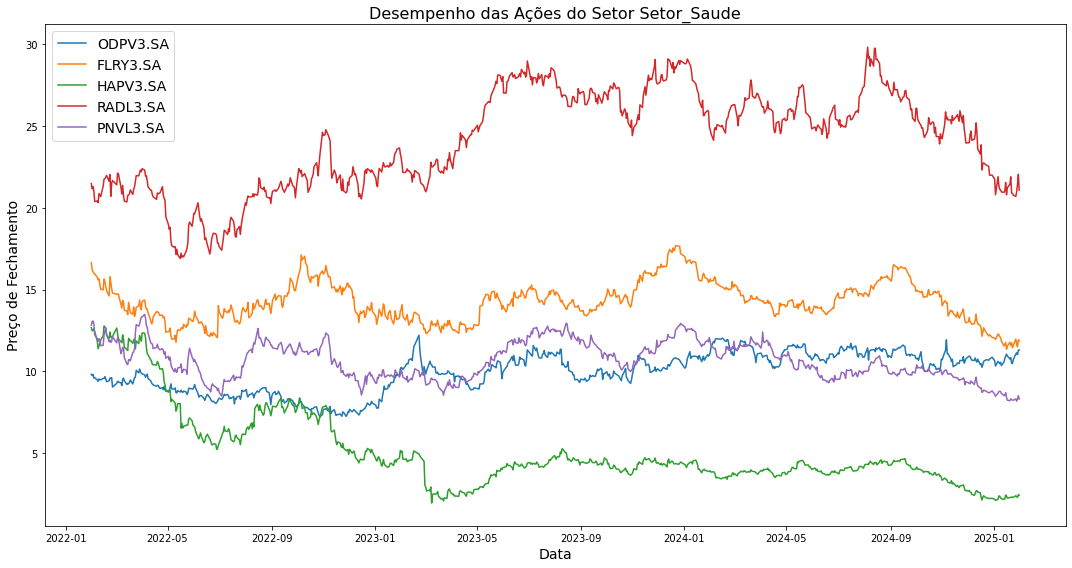

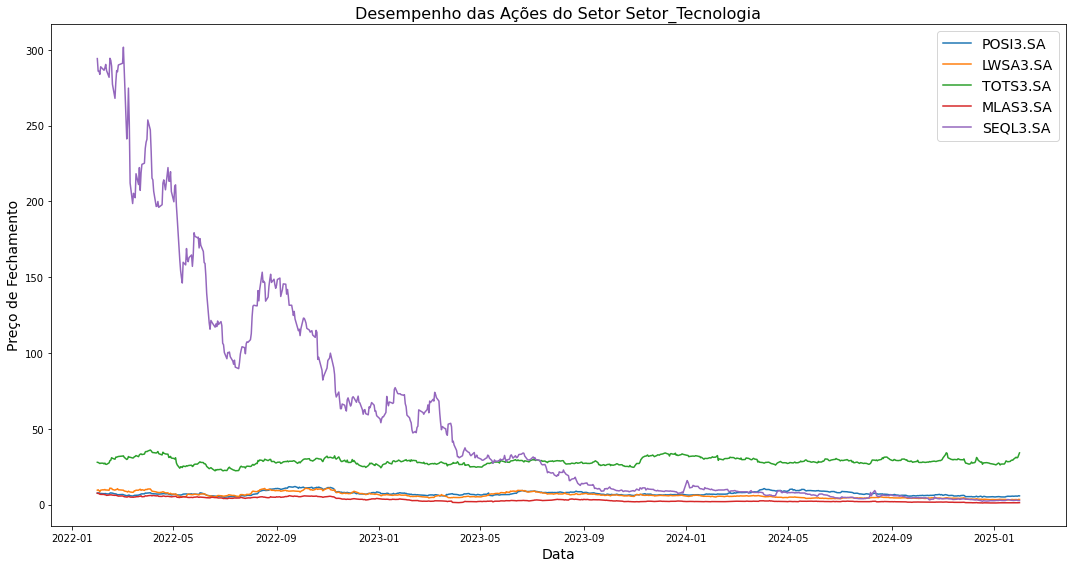

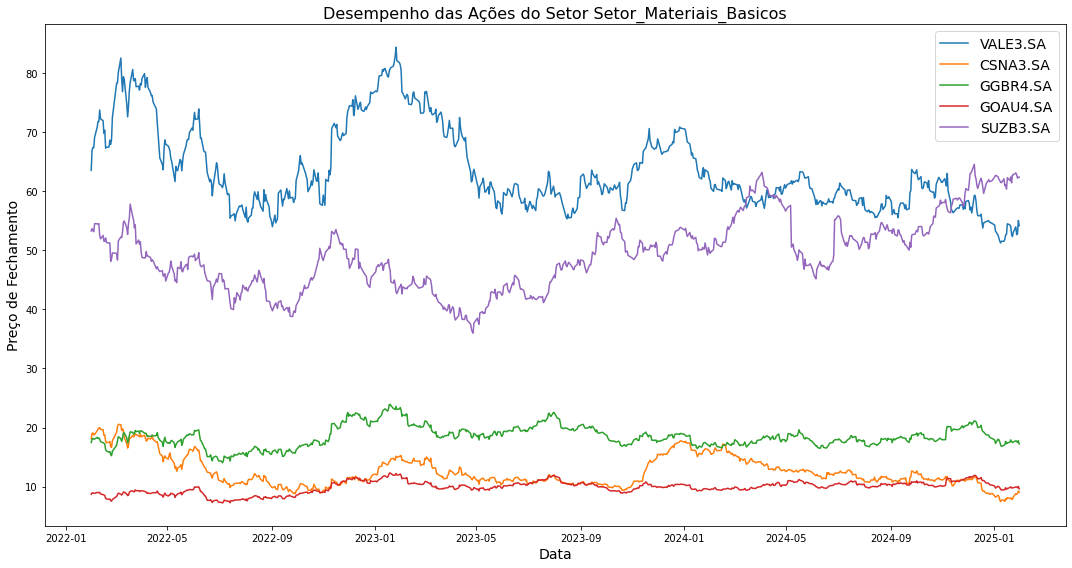

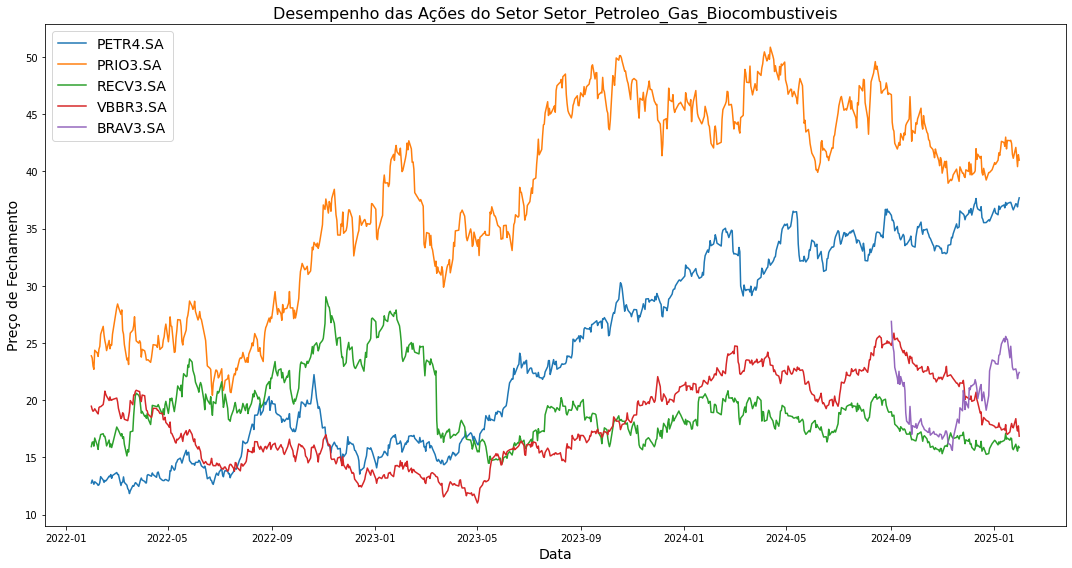

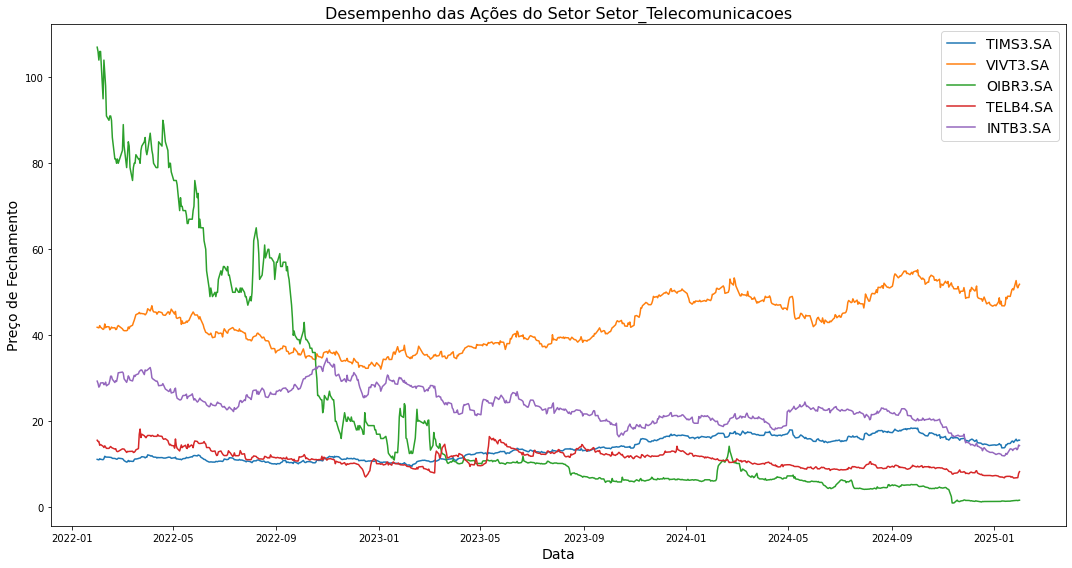

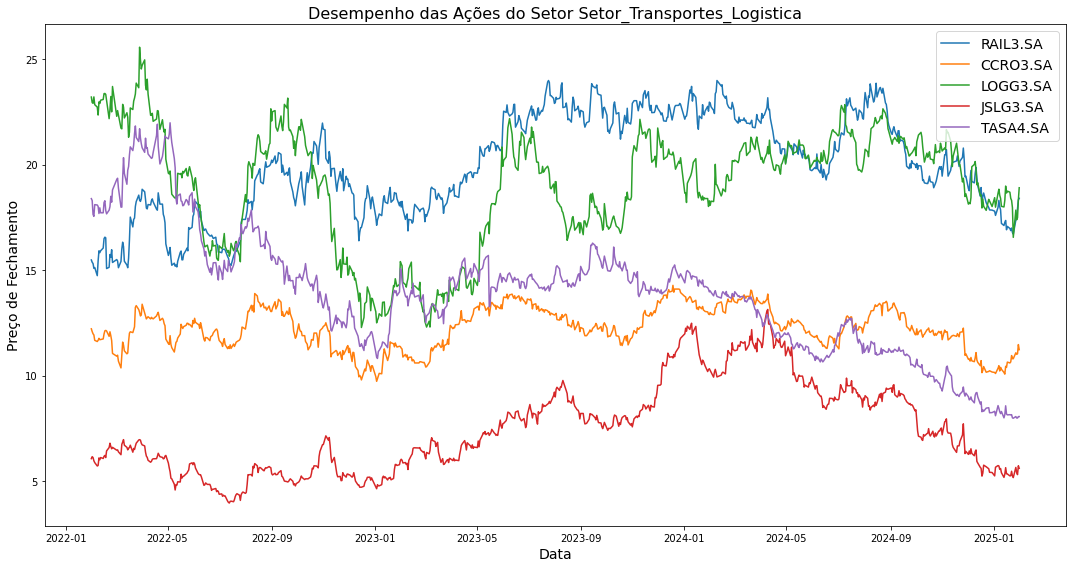

In [437]:
# Loop para plotar os gráficos
for setor, tickers in setores.items():
    plt.figure(figsize=(15, 8))
    plt.title(f"Desempenho das Ações do Setor {setor}", fontsize=16)

    for ticker in tickers:
        df_ativo = dados_setores[setor][dados_setores[setor]['Ticker'] == ticker]
        sns.lineplot(x=df_ativo.index, y=df_ativo['Adj Close'], label=ticker)

    plt.xlabel("Data", fontsize=14)
    plt.ylabel("Preço de Fechamento", fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

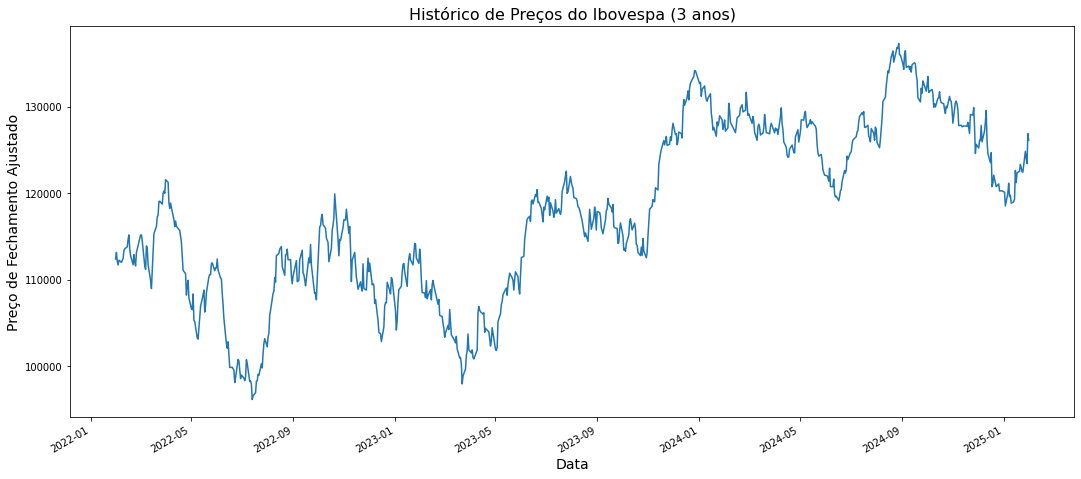

In [438]:
# Plota o gráfico do Ibovespa
IBovespa['Adj Close'].plot(figsize=(18,8))
plt.title("Histórico de Preços do Ibovespa (3 anos)", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Preço de Fechamento Ajustado", fontsize=14)
plt.show()

# Normalizando as Carteiras

In [439]:
# Loop para normalizar cada carteira
dados_setores_normalizados = {}

for setor, df_setor in dados_setores.items():
    df_setor_normalizado = pd.DataFrame()
    for ticker in df_setor['Ticker'].unique():  # Itera sobre tickers únicos no setor
        df_ativo = df_setor[df_setor['Ticker'] == ticker]
        df_ativo_normalizado = (df_ativo['Adj Close'] / df_ativo['Adj Close'].iloc[0]) * 1000
        df_ativo_normalizado = df_ativo_normalizado.rename(ticker)  # Renomeia a série com o ticker
        df_setor_normalizado = pd.concat([df_setor_normalizado, df_ativo_normalizado], axis=1)
    dados_setores_normalizados[setor] = df_setor_normalizado

In [440]:
for setor, carteira_normalizada in dados_setores_normalizados.items():
    display(carteira_normalizada)

ITUB4.SA     BBDC4.SA    SANB11.SA    BPAC11.SA     BBAS3.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
2022-02-01  1007.017784  1003.508668   990.936458  1008.735643   998.469032
2022-02-02   991.215578   985.465949   963.443936   972.961839   981.935063
2022-02-03  1002.672318   999.951917   967.975743   960.066678   988.671264
2022-02-04  1005.833041  1006.536510   974.018010   951.331121   986.834132
...                 ...          ...          ...          ...          ...
2025-01-27  1534.173687   686.873817   926.283167  1427.879269  2151.890241
2025-01-28  1536.942841   689.839605   921.485645  1416.604164  2137.912009
2025-01-29  1533.250577   682.721748   914.473991  1408.486075  2130.922819
2025-01-30  1570.635561   720.090538   949.532474  1445.468405  2146.454237
2025-01-31  1560.481704   717.124750   958.020311  1468.920644  2149.560609

[751 rows x 5 columns]

CPLE6.SA     CMIG4.SA    TAEE11.SA     EGIE3.SA     CPFE3.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
2022-02-01  1001.392800  1009.900998   986.415885  1002.702785  1003.456716
2022-02-02   988.857921   992.383906   985.893470   992.629071   980.642989
2022-02-03  1011.141998   999.238523   991.640631  1011.056566   996.543363
2022-02-04  1006.963840   975.628387   981.975125  1001.965474   978.223224
...                 ...          ...          ...          ...          ...
2025-01-27  1602.196239  2138.126864  1125.974544  1088.037357  1402.381612
2025-01-28  1612.368985  2144.093677  1121.820970  1106.703157  1408.186833
2025-01-29  1614.064470  2124.204238  1119.744118  1105.498997  1397.405731
2025-01-30  1664.927714  2171.939118  1148.819397  1109.412718  1427.261175
2025-01-31  1644.582384  2179.894932  1159.895681  1107.907432  1425.602654

[751 rows x 5 columns]

JHSF3.SA     LREN3.SA     LEVE3.SA     RENT3.SA     YDUQ3.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
2022-02-01   973.561540   959.459540  1001.223916  1001.194579  1004.070602
2022-02-02   958.009443   945.590363   991.431990   997.610984   995.024809
2022-02-03   968.895807   948.435415   953.182438   981.228775  1016.734480
2022-02-04   925.349975   931.721185   939.106465   976.450529   977.838080
...                 ...          ...          ...          ...          ...
2025-01-27   762.535846   603.298066  1247.546289   593.831050   448.482896
2025-01-28   756.639907   593.574610  1247.992968   587.463926   436.742506
2025-01-29   758.605204   591.806706  1239.506235   565.178865   442.847514
2025-01-30   788.084754   614.347481  1284.173126   592.894718   486.521733
2025-01-31   784.317025   603.298066  1266.306387   578.100459   481.355978

[751 rows x 5 columns]

ABEV3.SA     BRFS3.SA     JBSS3.SA     SMTO3.SA     AGRO3.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
2022-02-01   991.983942   968.652065   996.865190  1017.419735  1041.159626
2022-02-02   969.939932   893.417037   991.735459  1004.899344  1036.149091
2022-02-03   965.931829   888.938660   965.232170   991.018044  1007.516091
2022-02-04   962.591830   839.677569   975.776621  1000.000000  1000.000000
...                 ...          ...          ...          ...          ...
2025-01-27   868.182758  1027.675119  1226.785531   717.254456  1139.285418
2025-01-28   867.402001  1012.487805  1215.601172   701.902263  1149.372091
2025-01-29   856.471690  1013.868502  1217.698289   690.234564  1132.224804
2025-01-30   867.402001  1012.487805  1223.989508   718.482601  1162.484632
2025-01-31   866.621317  1007.425338  1238.668930   696.682515  1143.320068

[751 rows x 5 columns]

ODPV3.SA     FLRY3.SA     HAPV3.SA     RADL3.SA     PNVL3.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
2022-02-01   991.987172   971.810125   985.781966   985.319647  1018.208334
2022-02-02   999.198766   966.864579   986.571874   991.364268  1020.393432
2022-02-03   977.564178   959.940746   996.050538   978.411026  1005.826780
2022-02-04   978.365412   958.951546   981.832579   949.049965   953.386802
...                 ...          ...          ...          ...          ...
2025-01-27  1126.863287   718.762838   187.993692   963.400626   648.420481
2025-01-28  1133.995302   698.947326   183.254341   977.362918   637.496403
2025-01-29  1122.787837   690.540723   180.884675   998.306444   649.200713
2025-01-30  1150.297106   716.360960   193.522913  1026.231028   664.026253
2025-01-31  1151.315993   710.956719   191.153247   981.551623   647.640173

[751 rows x 5 columns]

POSI3.SA     LWSA3.SA     TOTS3.SA     MLAS3.SA     SEQL3.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
2022-02-01   988.247979  1027.835087   995.527943   970.090982   971.821791
2022-02-02  1023.504294   974.226842   984.520167   962.288696   971.821791
2022-02-03   979.700934   901.030924   970.072268   906.371867   964.613405
2022-02-04   961.538645  1003.092743   979.360086   892.067612   981.651418
...                 ...          ...          ...          ...          ...
2025-01-27   739.836626   350.208781  1119.658307   154.487086     9.722304
2025-01-28   724.039417   339.628465  1104.590879   154.487086     9.858281
2025-01-29   734.570890   337.512402  1117.505827   155.818870     9.008429
2025-01-30   763.532501   362.905185  1169.883344   165.141374     9.008429
2025-01-31   751.684564   355.498939  1221.902102   165.141374     9.008429

[751 rows x 5 columns]

VALE3.SA     CSNA3.SA     GGBR4.SA     GOAU4.SA     SUZB3.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
2022-02-01  1054.903070  1050.508996  1031.968443  1027.657925  1007.432583
2022-02-02  1060.838290  1055.599004  1039.870765  1026.793491  1001.182383
2022-02-03  1060.343789  1037.979729  1031.968443  1021.607658   997.804054
2022-02-04  1088.166200  1042.678125  1033.764554  1019.879120  1023.310810
...                 ...          ...          ...          ...          ...
2025-01-27   849.510384   486.744162  1016.221566  1142.078271  1184.579470
2025-01-28   828.886653   482.872298  1011.641417  1140.929383  1178.383347
2025-01-29   831.248117   486.744162  1000.190990  1125.992731  1167.868818
2025-01-30   866.355748   511.634477  1017.366631  1152.419038  1170.872979
2025-01-31   852.816470   502.784592   985.878010  1105.311198  1171.060708

[751 rows x 5 columns]

PETR4.SA     PRIO3.SA     RECV3.SA     VBBR3.SA    BRAV3.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000         NaN
2022-02-01  1020.092853   992.474957  1024.019456   985.589496         NaN
2022-02-02  1005.254969   962.792726  1025.980311   977.292557         NaN
2022-02-03   991.344704   950.668876  1002.450770   980.785995         NaN
2022-02-04  1008.655445  1020.484938  1047.058724   988.646377         NaN
...                 ...          ...          ...          ...         ...
2025-01-27  2912.243559  1762.860341  1013.378762   944.175701  845.667545
2025-01-28  2908.327207  1732.711768   991.430619   905.669350  834.511009
2025-01-29  2890.311751  1692.513404   975.126243   888.726559  814.057266
2025-01-30  2928.692415  1736.061538  1002.718213   911.830409  827.817060
2025-01-31  2952.190824  1716.381258   995.193131   865.622807  834.139115

[751 rows x 5 columns]

TIMS3.SA     VIVT3.SA     OIBR3.SA     TELB4.SA     INTB3.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
2022-02-01   993.971317   998.590674   990.654206   980.769219   981.469677
2022-02-02   990.203465   996.779309   971.962617   980.769219   952.396302
2022-02-03  1012.810748  1009.259123   990.654206   924.358957   961.661431
2022-02-04  1003.014299  1000.603697   990.654206   935.897437   985.303702
...                 ...          ...          ...          ...          ...
2025-01-27  1421.889473  1259.595416    14.953271   439.102547   469.272054
2025-01-28  1386.902888  1227.824898    15.046729   439.102547   456.321914
2025-01-29  1387.800000  1219.225332    14.485981   442.307688   465.182509
2025-01-30  1403.050556  1231.646917    15.233645   505.769210   493.468330
2025-01-31  1400.359221  1239.052028    15.420561   531.410241   488.697248

[751 rows x 5 columns]

RAIL3.SA     CCRO3.SA     LOGG3.SA     JSLG3.SA     TASA4.SA
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
2022-02-01   992.957755   989.230697   988.684507  1015.406172   994.977249
2022-02-02   989.116519   980.769270   987.270122  1008.403410   959.360988
2022-02-03   974.391742   976.153832  1000.353494   983.193338   954.337925
2022-02-04   976.952648   955.384597   984.441270   969.187655   984.474953
...                 ...          ...          ...          ...          ...
2025-01-27  1122.860885   906.930619   769.092843   931.268567   438.405208
2025-01-28  1135.782234   901.200938   749.261931   891.710216   434.597684
2025-01-29  1157.102374   902.837956   753.573006   875.227602   434.597684
2025-01-30  1183.591028   938.853296   789.785904   944.454657   438.405208
2025-01-31  1188.759543   919.208530   814.790040   924.675521   438.405208

[751 rows x 5 columns]

In [441]:
# Calcula o IBOV normalizado
IBOV_Normalizado = (IBovespa['Adj Close'] / IBovespa['Adj Close'].iloc[0]) * 5000

# Cria o DataFrame com o IBOV normalizado
IBOV_Normalizado = pd.DataFrame({'IBOV_Normalizado': IBOV_Normalizado})
IBOV_Normalizado.index = pd.to_datetime(IBOV_Normalizado.index)

# Exibe o DataFrame
display(IBOV_Normalizado)

IBOV_Normalizado
Date                        
2022-01-31       5000.000000
2022-02-01       5033.766950
2022-02-02       4989.901057
2022-02-03       4969.213795
2022-02-04       4993.638111
...                      ...
2025-01-27       5554.952486
2025-01-28       5519.094565
2025-01-29       5491.333594
2025-01-30       5646.198882
2025-01-31       5611.586646

[751 rows x 1 columns]

# Visualizando os valores normalizados

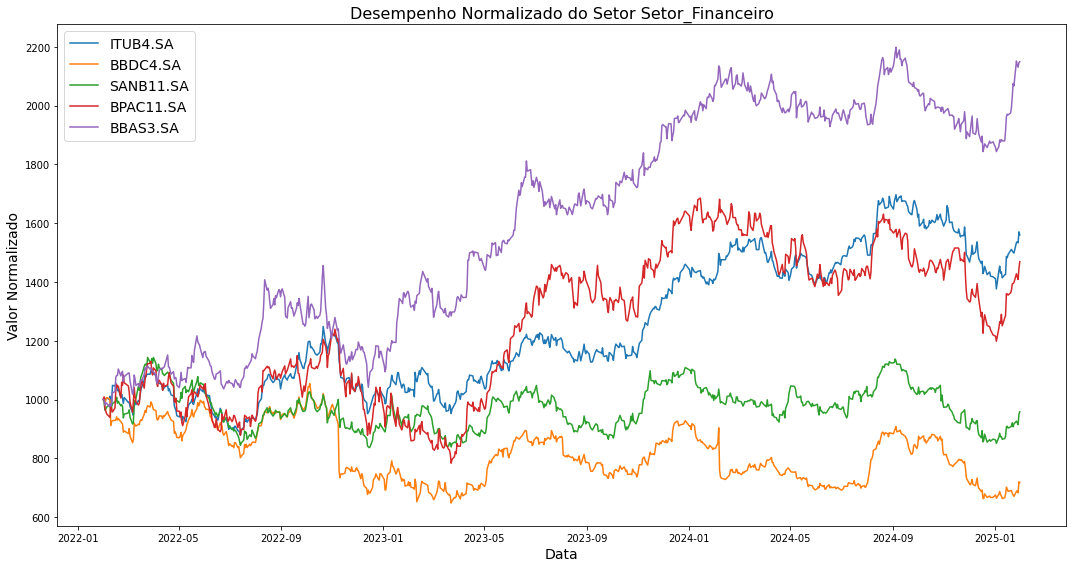

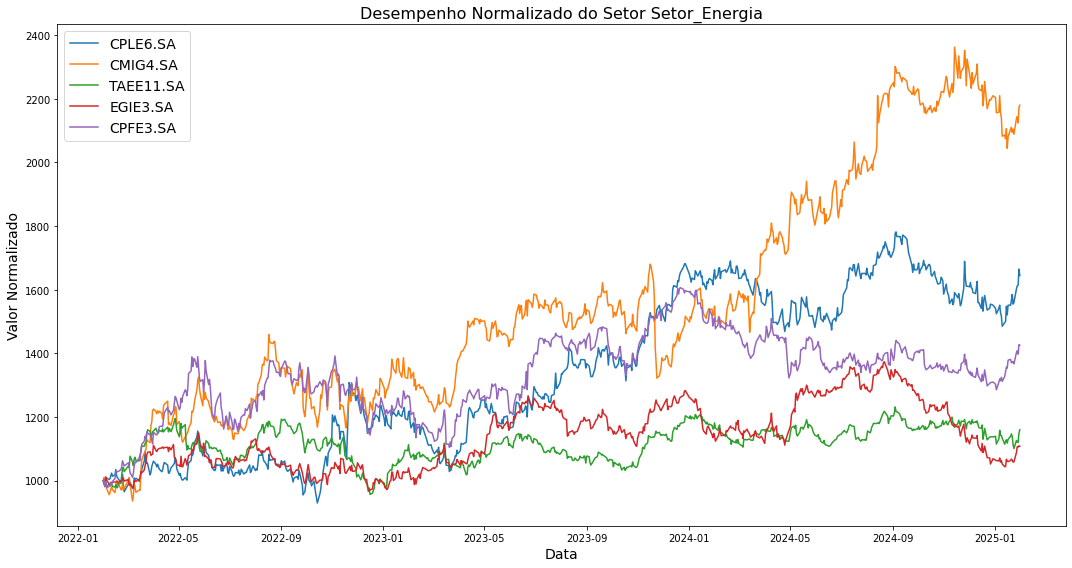

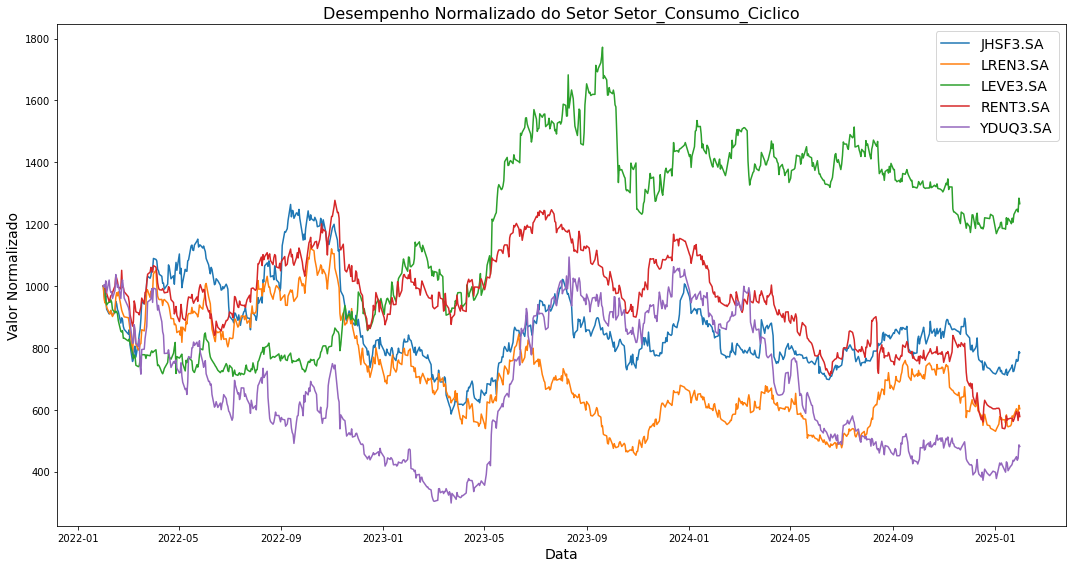

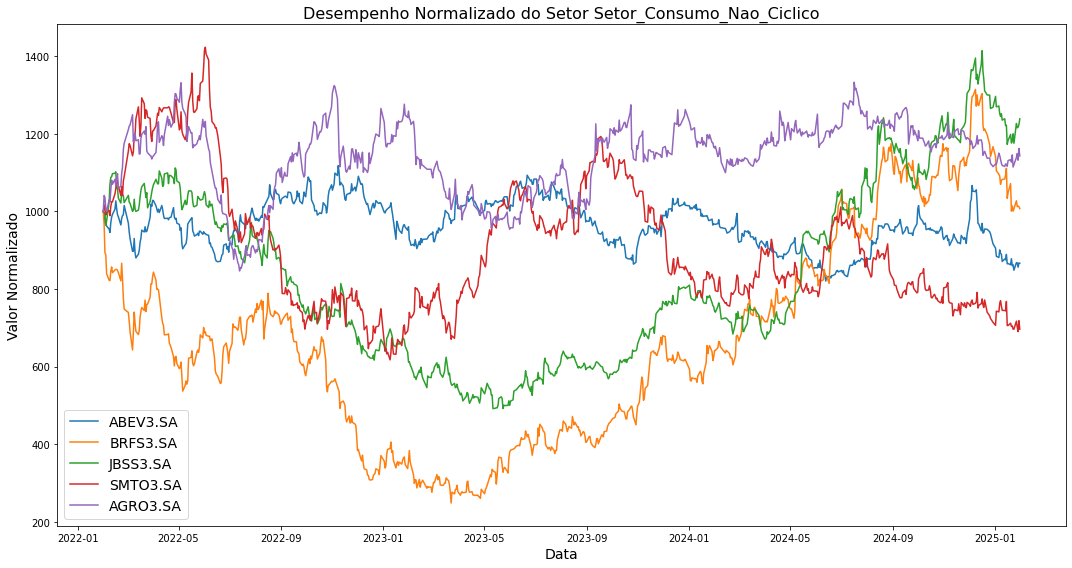

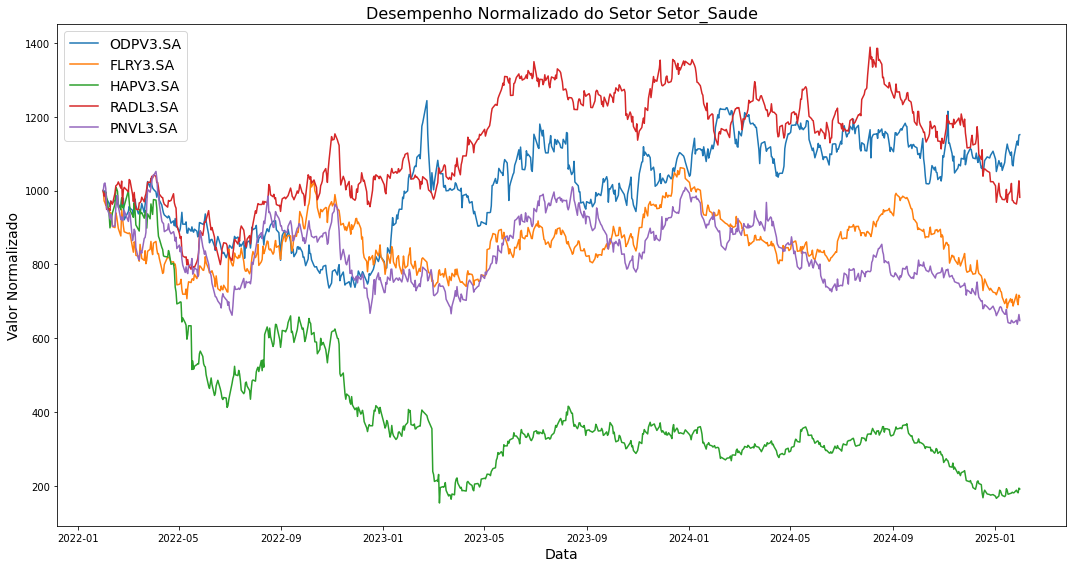

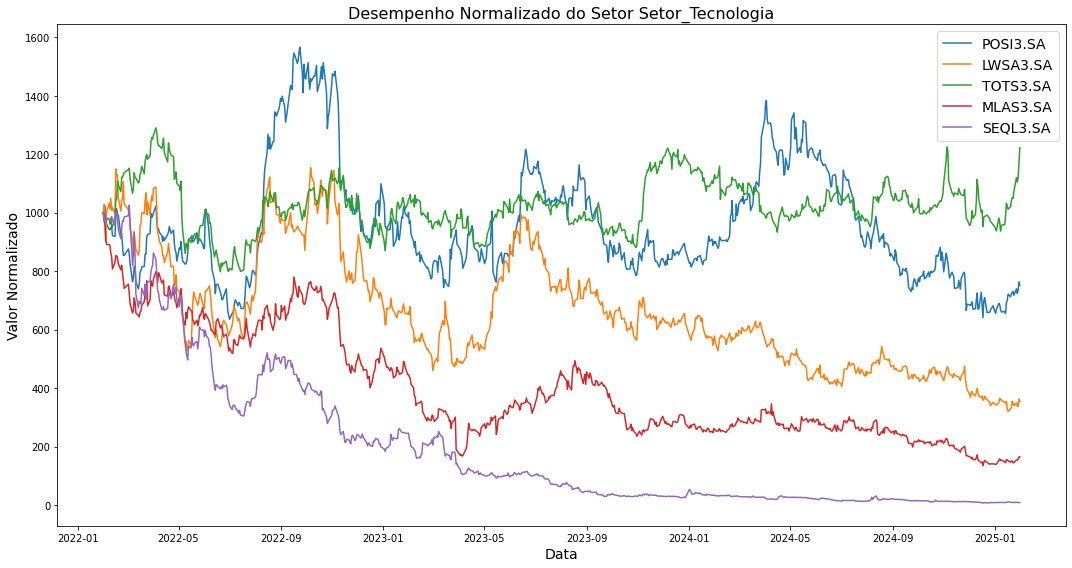

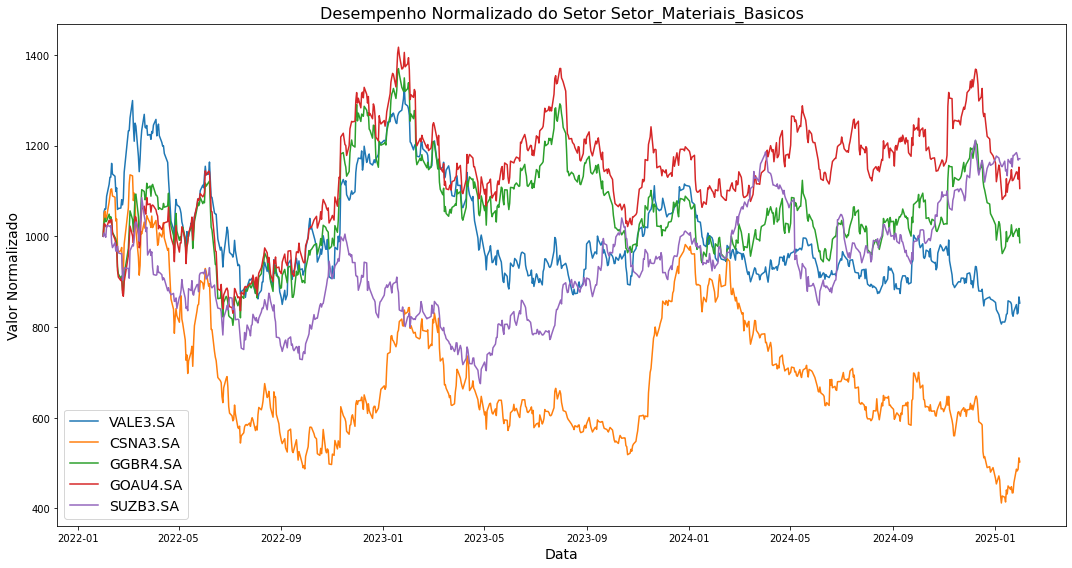

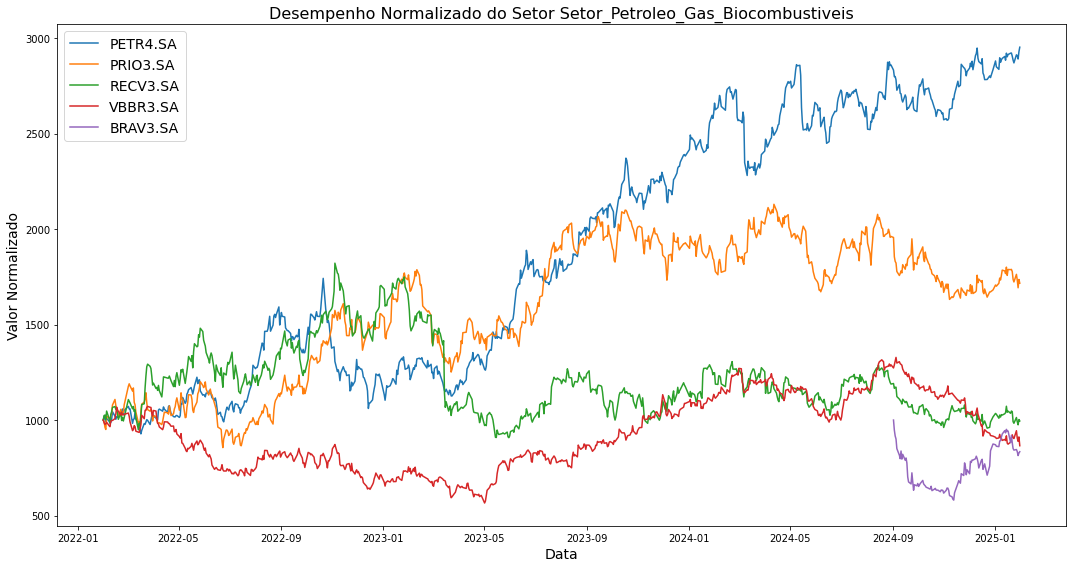

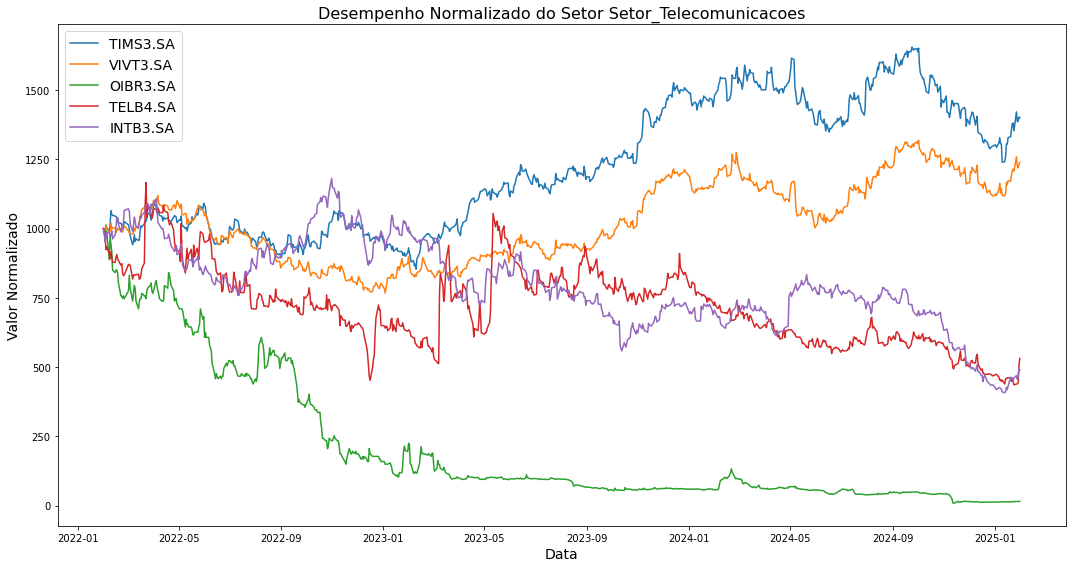

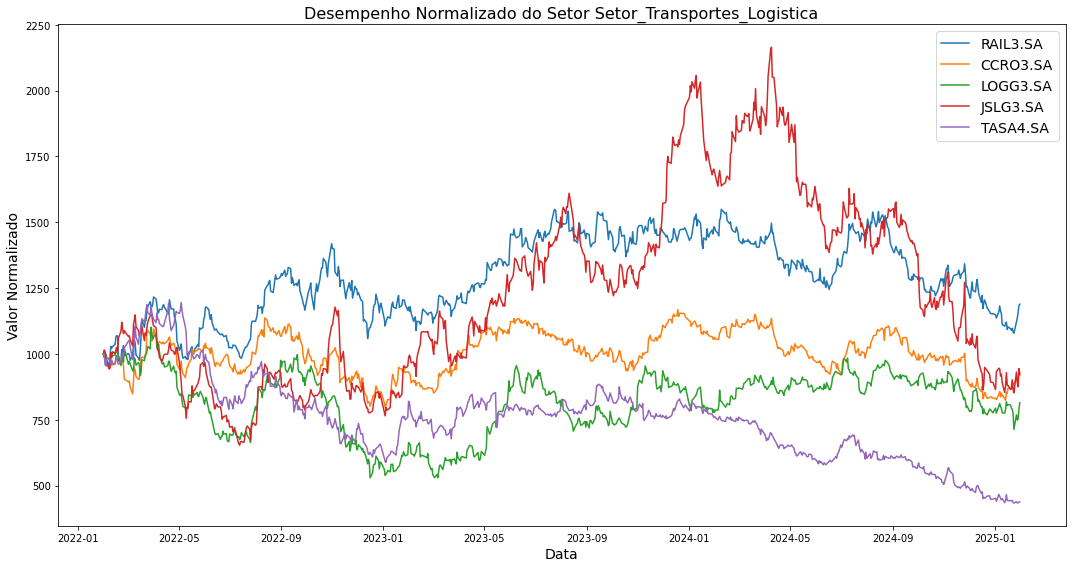

In [442]:
# Loop para plotar os gráficos das carteiras normalizadas
for setor, carteira_normalizada in dados_setores_normalizados.items():
    plt.figure(figsize=(15, 8))
    plt.title(f"Desempenho Normalizado do Setor {setor}", fontsize=16)

    for ticker in carteira_normalizada.columns:  # Itera sobre os tickers (colunas) da carteira normalizada
        sns.lineplot(x=carteira_normalizada.index, y=carteira_normalizada[ticker], label=ticker)

    plt.xlabel("Data", fontsize=14)
    plt.ylabel("Valor Normalizado", fontsize=14)  # Atualizado para refletir a normalização
    plt.legend(fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

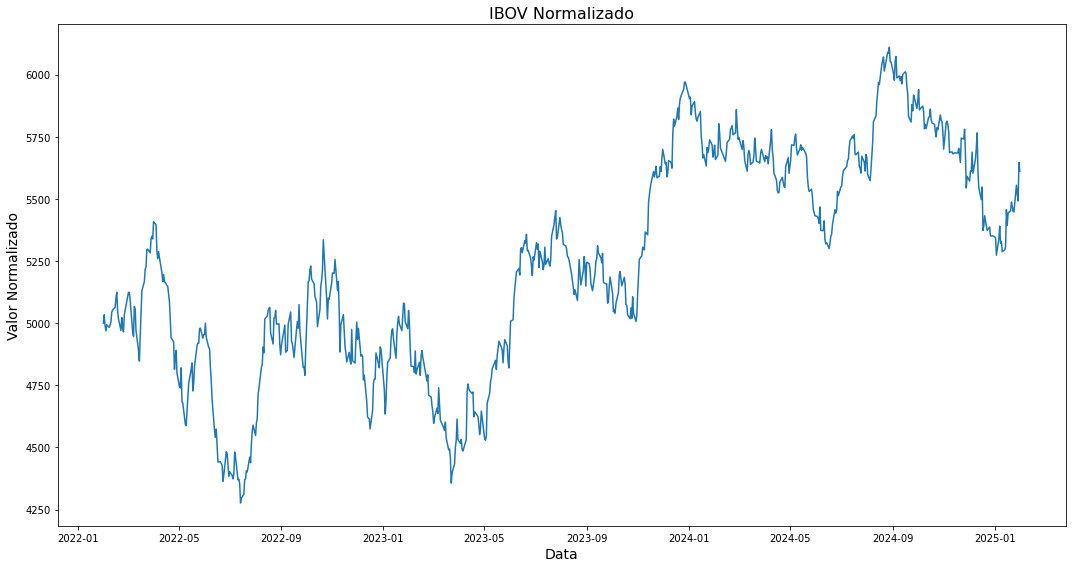

In [443]:
# Plot do gráfico do IBOV normalizado
plt.figure(figsize=(15, 8))
sns.lineplot(x=IBOV_Normalizado.index, y=IBOV_Normalizado['IBOV_Normalizado'])
plt.title("IBOV Normalizado", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Valor Normalizado", fontsize=14)
plt.grid(False)  # Remove as linhas de grade
plt.tight_layout()
plt.show()

# Definindo o valor final de cada carteira

In [444]:
# Loop para calcular o saldo e exibir os DataFrames por tipo e valor final
for setor, carteira_normalizada in dados_setores_normalizados.items():
    # Calcula o saldo da carteira (soma dos valores normalizados das ações)
    carteira_normalizada["Valor"] = carteira_normalizada.sum(axis=1)

    # Exibe o DataFrame da carteira normalizada
    print(f"Carteira normalizada do setor {setor}:")
    display(carteira_normalizada)  # Exibe o DataFrame completo

    # Exibe o tipo e o valor final da carteira
    tipo_carteira = setor  # O tipo da carteira é o nome do setor
    valor_final = carteira_normalizada["Valor"].iloc[-1]  # Último valor da coluna "Valor"

Carteira normalizada do setor Setor_Financeiro:


ITUB4.SA     BBDC4.SA    SANB11.SA    BPAC11.SA     BBAS3.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2022-02-01  1007.017784  1003.508668   990.936458  1008.735643   998.469032   
2022-02-02   991.215578   985.465949   963.443936   972.961839   981.935063   
2022-02-03  1002.672318   999.951917   967.975743   960.066678   988.671264   
2022-02-04  1005.833041  1006.536510   974.018010   951.331121   986.834132   
...                 ...          ...          ...          ...          ...   
2025-01-27  1534.173687   686.873817   926.283167  1427.879269  2151.890241   
2025-01-28  1536.942841   689.839605   921.485645  1416.604164  2137.912009   
2025-01-29  1533.250577   682.721748   914.473991  1408.486075  2130.922819   
2025-01-30  1570.635561   720.090538   949.532474  1445.468405  2146.454237   
2025-01-31  1560.481704   717.124750   958.020311  1468.920644  2149.560609   

                  Valor  
2022-01-31  5000.000000  
2022-02-01  5008.667584  
2022-02-02  4895.022365  
2022-02-03  4919.337920  
2022-02-04  4924.552814  
...                 ...  
2025-01-27  6727.100181  
2025-01-28  6702.784263  
2025-01-29  6669.855209  
2025-01-30  6832.181215  
2025-01-31  6854.108018  

[751 rows x 6 columns]

Carteira normalizada do setor Setor_Energia:


CPLE6.SA     CMIG4.SA    TAEE11.SA     EGIE3.SA     CPFE3.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2022-02-01  1001.392800  1009.900998   986.415885  1002.702785  1003.456716   
2022-02-02   988.857921   992.383906   985.893470   992.629071   980.642989   
2022-02-03  1011.141998   999.238523   991.640631  1011.056566   996.543363   
2022-02-04  1006.963840   975.628387   981.975125  1001.965474   978.223224   
...                 ...          ...          ...          ...          ...   
2025-01-27  1602.196239  2138.126864  1125.974544  1088.037357  1402.381612   
2025-01-28  1612.368985  2144.093677  1121.820970  1106.703157  1408.186833   
2025-01-29  1614.064470  2124.204238  1119.744118  1105.498997  1397.405731   
2025-01-30  1664.927714  2171.939118  1148.819397  1109.412718  1427.261175   
2025-01-31  1644.582384  2179.894932  1159.895681  1107.907432  1425.602654   

                  Valor  
2022-01-31  5000.000000  
2022-02-01  5003.869185  
2022-02-02  4940.407357  
2022-02-03  5009.621081  
2022-02-04  4944.756050  
...                 ...  
2025-01-27  7356.716617  
2025-01-28  7393.173622  
2025-01-29  7360.917554  
2025-01-30  7522.360122  
2025-01-31  7517.883082  

[751 rows x 6 columns]

Carteira normalizada do setor Setor_Consumo_Ciclico:


JHSF3.SA     LREN3.SA     LEVE3.SA     RENT3.SA     YDUQ3.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2022-02-01   973.561540   959.459540  1001.223916  1001.194579  1004.070602   
2022-02-02   958.009443   945.590363   991.431990   997.610984   995.024809   
2022-02-03   968.895807   948.435415   953.182438   981.228775  1016.734480   
2022-02-04   925.349975   931.721185   939.106465   976.450529   977.838080   
...                 ...          ...          ...          ...          ...   
2025-01-27   762.535846   603.298066  1247.546289   593.831050   448.482896   
2025-01-28   756.639907   593.574610  1247.992968   587.463926   436.742506   
2025-01-29   758.605204   591.806706  1239.506235   565.178865   442.847514   
2025-01-30   788.084754   614.347481  1284.173126   592.894718   486.521733   
2025-01-31   784.317025   603.298066  1266.306387   578.100459   481.355978   

                  Valor  
2022-01-31  5000.000000  
2022-02-01  4939.510178  
2022-02-02  4887.667590  
2022-02-03  4868.476915  
2022-02-04  4750.466233  
...                 ...  
2025-01-27  3655.694146  
2025-01-28  3622.413918  
2025-01-29  3597.944524  
2025-01-30  3766.021812  
2025-01-31  3713.377915  

[751 rows x 6 columns]

Carteira normalizada do setor Setor_Consumo_Nao_Ciclico:


ABEV3.SA     BRFS3.SA     JBSS3.SA     SMTO3.SA     AGRO3.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2022-02-01   991.983942   968.652065   996.865190  1017.419735  1041.159626   
2022-02-02   969.939932   893.417037   991.735459  1004.899344  1036.149091   
2022-02-03   965.931829   888.938660   965.232170   991.018044  1007.516091   
2022-02-04   962.591830   839.677569   975.776621  1000.000000  1000.000000   
...                 ...          ...          ...          ...          ...   
2025-01-27   868.182758  1027.675119  1226.785531   717.254456  1139.285418   
2025-01-28   867.402001  1012.487805  1215.601172   701.902263  1149.372091   
2025-01-29   856.471690  1013.868502  1217.698289   690.234564  1132.224804   
2025-01-30   867.402001  1012.487805  1223.989508   718.482601  1162.484632   
2025-01-31   866.621317  1007.425338  1238.668930   696.682515  1143.320068   

                  Valor  
2022-01-31  5000.000000  
2022-02-01  5016.080558  
2022-02-02  4896.140864  
2022-02-03  4818.636794  
2022-02-04  4778.046020  
...                 ...  
2025-01-27  4979.183282  
2025-01-28  4946.765332  
2025-01-29  4910.497849  
2025-01-30  4984.846546  
2025-01-31  4952.718168  

[751 rows x 6 columns]

Carteira normalizada do setor Setor_Saude:


ODPV3.SA     FLRY3.SA     HAPV3.SA     RADL3.SA     PNVL3.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2022-02-01   991.987172   971.810125   985.781966   985.319647  1018.208334   
2022-02-02   999.198766   966.864579   986.571874   991.364268  1020.393432   
2022-02-03   977.564178   959.940746   996.050538   978.411026  1005.826780   
2022-02-04   978.365412   958.951546   981.832579   949.049965   953.386802   
...                 ...          ...          ...          ...          ...   
2025-01-27  1126.863287   718.762838   187.993692   963.400626   648.420481   
2025-01-28  1133.995302   698.947326   183.254341   977.362918   637.496403   
2025-01-29  1122.787837   690.540723   180.884675   998.306444   649.200713   
2025-01-30  1150.297106   716.360960   193.522913  1026.231028   664.026253   
2025-01-31  1151.315993   710.956719   191.153247   981.551623   647.640173   

                  Valor  
2022-01-31  5000.000000  
2022-02-01  4953.107244  
2022-02-02  4964.392920  
2022-02-03  4917.793268  
2022-02-04  4821.586304  
...                 ...  
2025-01-27  3645.440924  
2025-01-28  3631.056291  
2025-01-29  3641.720393  
2025-01-30  3750.438259  
2025-01-31  3682.617755  

[751 rows x 6 columns]

Carteira normalizada do setor Setor_Tecnologia:


POSI3.SA     LWSA3.SA     TOTS3.SA     MLAS3.SA     SEQL3.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2022-02-01   988.247979  1027.835087   995.527943   970.090982   971.821791   
2022-02-02  1023.504294   974.226842   984.520167   962.288696   971.821791   
2022-02-03   979.700934   901.030924   970.072268   906.371867   964.613405   
2022-02-04   961.538645  1003.092743   979.360086   892.067612   981.651418   
...                 ...          ...          ...          ...          ...   
2025-01-27   739.836626   350.208781  1119.658307   154.487086     9.722304   
2025-01-28   724.039417   339.628465  1104.590879   154.487086     9.858281   
2025-01-29   734.570890   337.512402  1117.505827   155.818870     9.008429   
2025-01-30   763.532501   362.905185  1169.883344   165.141374     9.008429   
2025-01-31   751.684564   355.498939  1221.902102   165.141374     9.008429   

                  Valor  
2022-01-31  5000.000000  
2022-02-01  4953.523782  
2022-02-02  4916.361790  
2022-02-03  4721.789398  
2022-02-04  4817.710504  
...                 ...  
2025-01-27  2373.913104  
2025-01-28  2332.604128  
2025-01-29  2354.416418  
2025-01-30  2470.470833  
2025-01-31  2503.235408  

[751 rows x 6 columns]

Carteira normalizada do setor Setor_Materiais_Basicos:


VALE3.SA     CSNA3.SA     GGBR4.SA     GOAU4.SA     SUZB3.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2022-02-01  1054.903070  1050.508996  1031.968443  1027.657925  1007.432583   
2022-02-02  1060.838290  1055.599004  1039.870765  1026.793491  1001.182383   
2022-02-03  1060.343789  1037.979729  1031.968443  1021.607658   997.804054   
2022-02-04  1088.166200  1042.678125  1033.764554  1019.879120  1023.310810   
...                 ...          ...          ...          ...          ...   
2025-01-27   849.510384   486.744162  1016.221566  1142.078271  1184.579470   
2025-01-28   828.886653   482.872298  1011.641417  1140.929383  1178.383347   
2025-01-29   831.248117   486.744162  1000.190990  1125.992731  1167.868818   
2025-01-30   866.355748   511.634477  1017.366631  1152.419038  1170.872979   
2025-01-31   852.816470   502.784592   985.878010  1105.311198  1171.060708   

                  Valor  
2022-01-31  5000.000000  
2022-02-01  5172.471016  
2022-02-02  5184.283933  
2022-02-03  5149.703672  
2022-02-04  5207.798808  
...                 ...  
2025-01-27  4679.133854  
2025-01-28  4642.713097  
2025-01-29  4612.044818  
2025-01-30  4718.648875  
2025-01-31  4617.850978  

[751 rows x 6 columns]

Carteira normalizada do setor Setor_Petroleo_Gas_Biocombustiveis:


PETR4.SA     PRIO3.SA     RECV3.SA     VBBR3.SA    BRAV3.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000         NaN   
2022-02-01  1020.092853   992.474957  1024.019456   985.589496         NaN   
2022-02-02  1005.254969   962.792726  1025.980311   977.292557         NaN   
2022-02-03   991.344704   950.668876  1002.450770   980.785995         NaN   
2022-02-04  1008.655445  1020.484938  1047.058724   988.646377         NaN   
...                 ...          ...          ...          ...         ...   
2025-01-27  2912.243559  1762.860341  1013.378762   944.175701  845.667545   
2025-01-28  2908.327207  1732.711768   991.430619   905.669350  834.511009   
2025-01-29  2890.311751  1692.513404   975.126243   888.726559  814.057266   
2025-01-30  2928.692415  1736.061538  1002.718213   911.830409  827.817060   
2025-01-31  2952.190824  1716.381258   995.193131   865.622807  834.139115   

                  Valor  
2022-01-31  4000.000000  
2022-02-01  4022.176762  
2022-02-02  3971.320563  
2022-02-03  3925.250345  
2022-02-04  4064.845483  
...                 ...  
2025-01-27  7478.325908  
2025-01-28  7372.649953  
2025-01-29  7260.735224  
2025-01-30  7407.119635  
2025-01-31  7363.527135  

[751 rows x 6 columns]

Carteira normalizada do setor Setor_Telecomunicacoes:


TIMS3.SA     VIVT3.SA     OIBR3.SA     TELB4.SA     INTB3.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2022-02-01   993.971317   998.590674   990.654206   980.769219   981.469677   
2022-02-02   990.203465   996.779309   971.962617   980.769219   952.396302   
2022-02-03  1012.810748  1009.259123   990.654206   924.358957   961.661431   
2022-02-04  1003.014299  1000.603697   990.654206   935.897437   985.303702   
...                 ...          ...          ...          ...          ...   
2025-01-27  1421.889473  1259.595416    14.953271   439.102547   469.272054   
2025-01-28  1386.902888  1227.824898    15.046729   439.102547   456.321914   
2025-01-29  1387.800000  1219.225332    14.485981   442.307688   465.182509   
2025-01-30  1403.050556  1231.646917    15.233645   505.769210   493.468330   
2025-01-31  1400.359221  1239.052028    15.420561   531.410241   488.697248   

                  Valor  
2022-01-31  5000.000000  
2022-02-01  4945.455093  
2022-02-02  4892.110912  
2022-02-03  4898.744464  
2022-02-04  4915.473341  
...                 ...  
2025-01-27  3604.812762  
2025-01-28  3525.198977  
2025-01-29  3529.001510  
2025-01-30  3649.168658  
2025-01-31  3674.939299  

[751 rows x 6 columns]

Carteira normalizada do setor Setor_Transportes_Logistica:


RAIL3.SA     CCRO3.SA     LOGG3.SA     JSLG3.SA     TASA4.SA  \
2022-01-31  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
2022-02-01   992.957755   989.230697   988.684507  1015.406172   994.977249   
2022-02-02   989.116519   980.769270   987.270122  1008.403410   959.360988   
2022-02-03   974.391742   976.153832  1000.353494   983.193338   954.337925   
2022-02-04   976.952648   955.384597   984.441270   969.187655   984.474953   
...                 ...          ...          ...          ...          ...   
2025-01-27  1122.860885   906.930619   769.092843   931.268567   438.405208   
2025-01-28  1135.782234   901.200938   749.261931   891.710216   434.597684   
2025-01-29  1157.102374   902.837956   753.573006   875.227602   434.597684   
2025-01-30  1183.591028   938.853296   789.785904   944.454657   438.405208   
2025-01-31  1188.759543   919.208530   814.790040   924.675521   438.405208   

                  Valor  
2022-01-31  5000.000000  
2022-02-01  4981.256381  
2022-02-02  4924.920309  
2022-02-03  4888.430331  
2022-02-04  4870.441122  
...                 ...  
2025-01-27  4168.558122  
2025-01-28  4112.553003  
2025-01-29  4123.338622  
2025-01-30  4295.090094  
2025-01-31  4285.838842  

[751 rows x 6 columns]

# Plotando a comparação entre os desempenhos das carteiras setoriais vs IBovespa

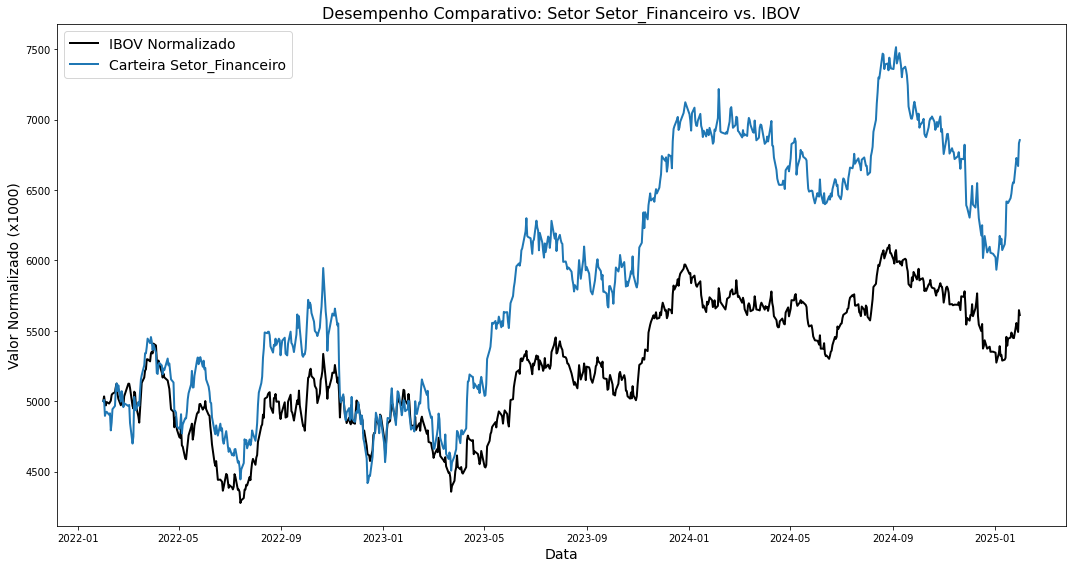

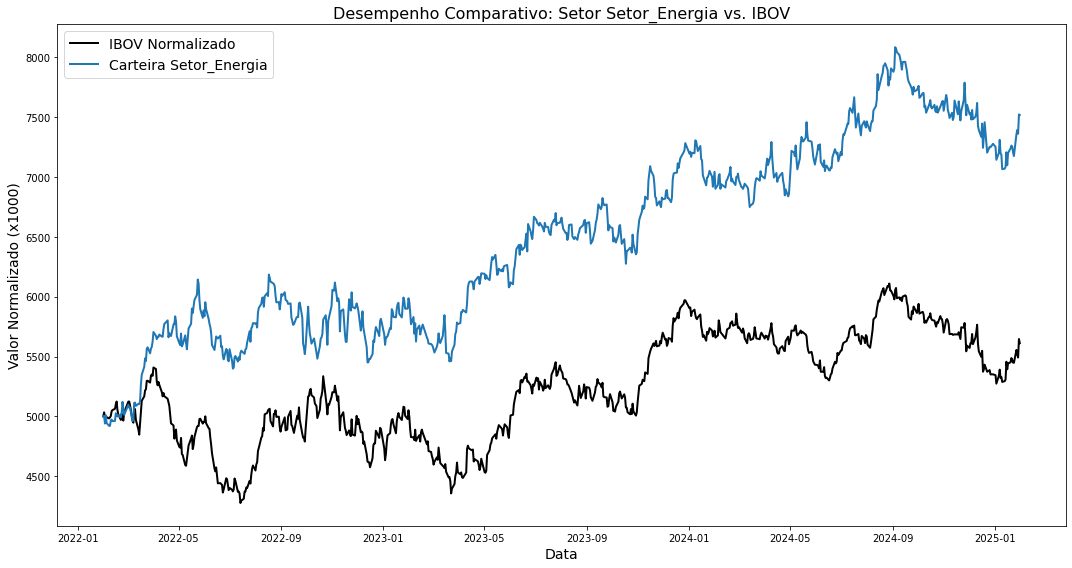

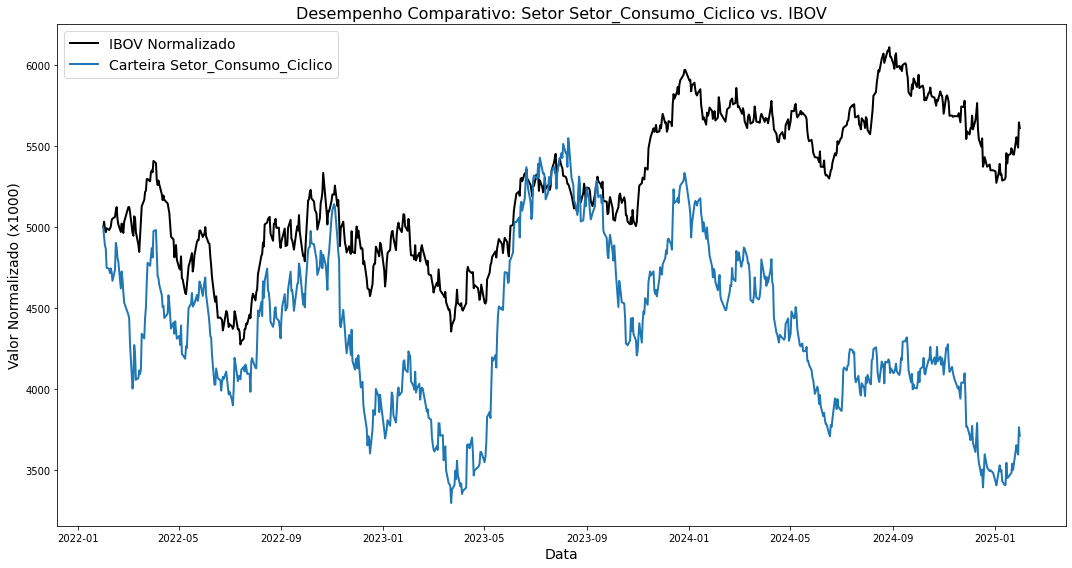

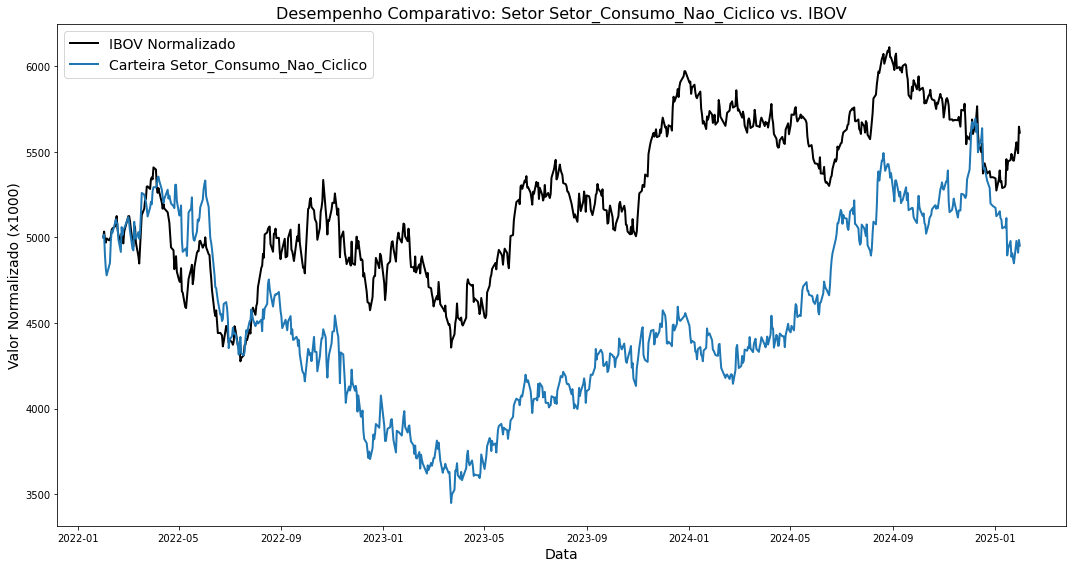

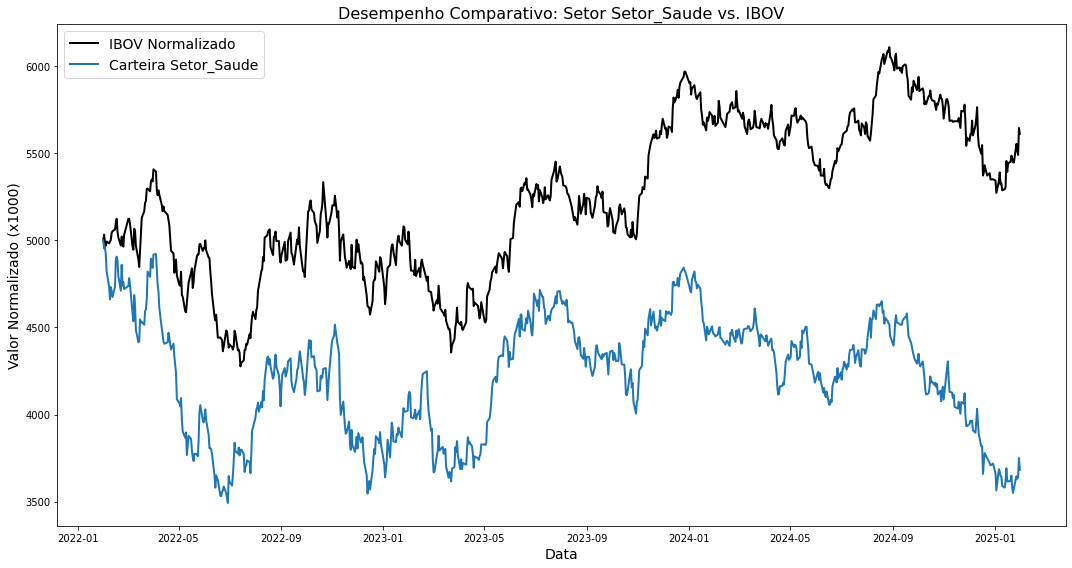

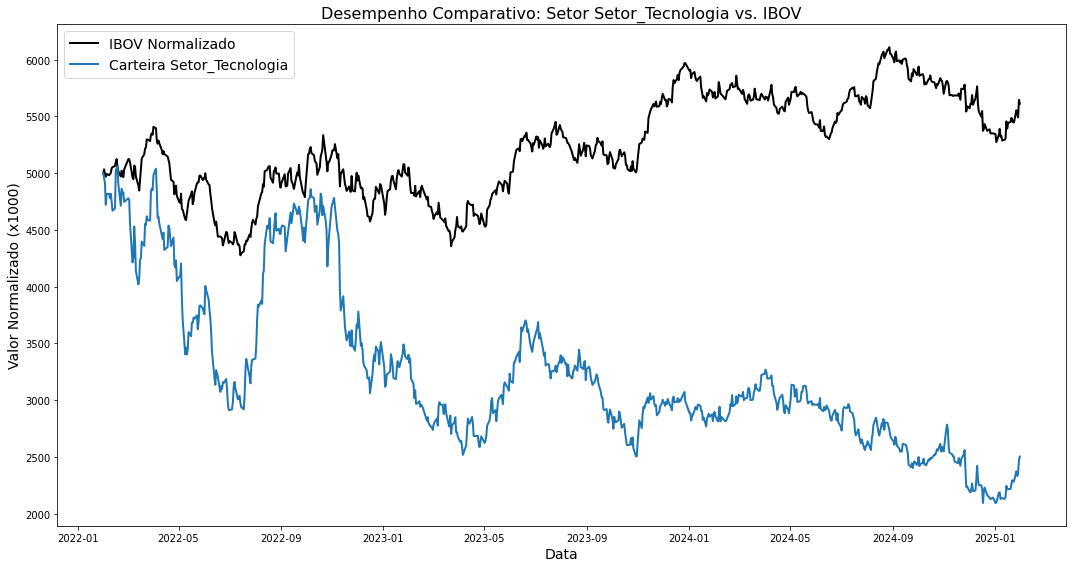

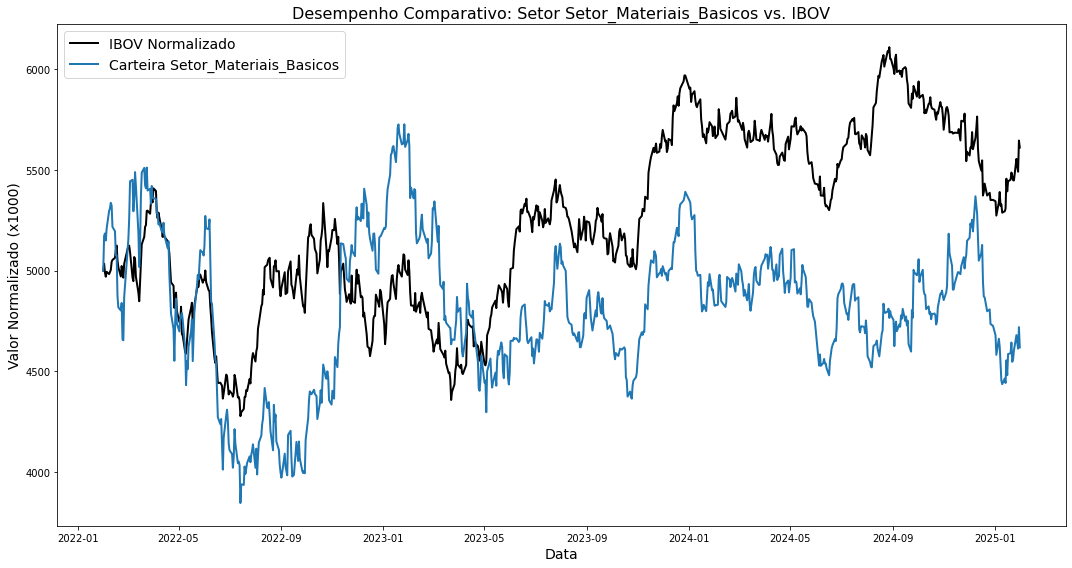

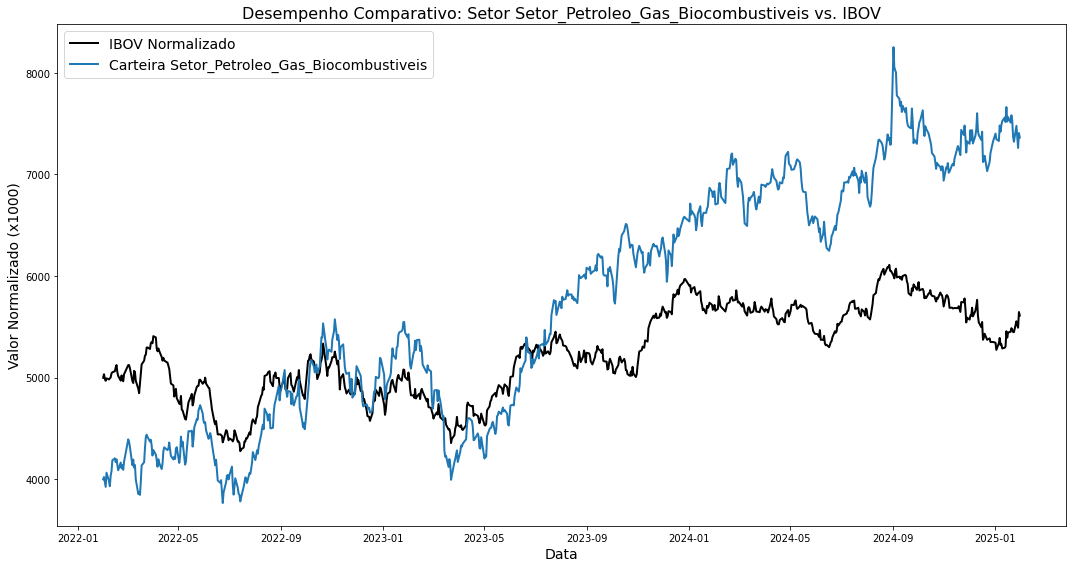

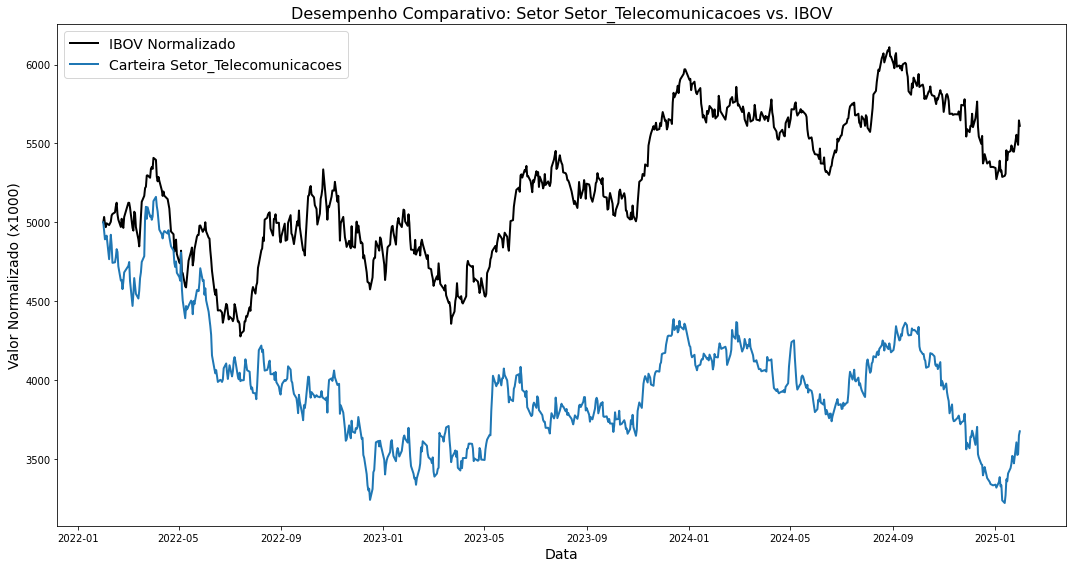

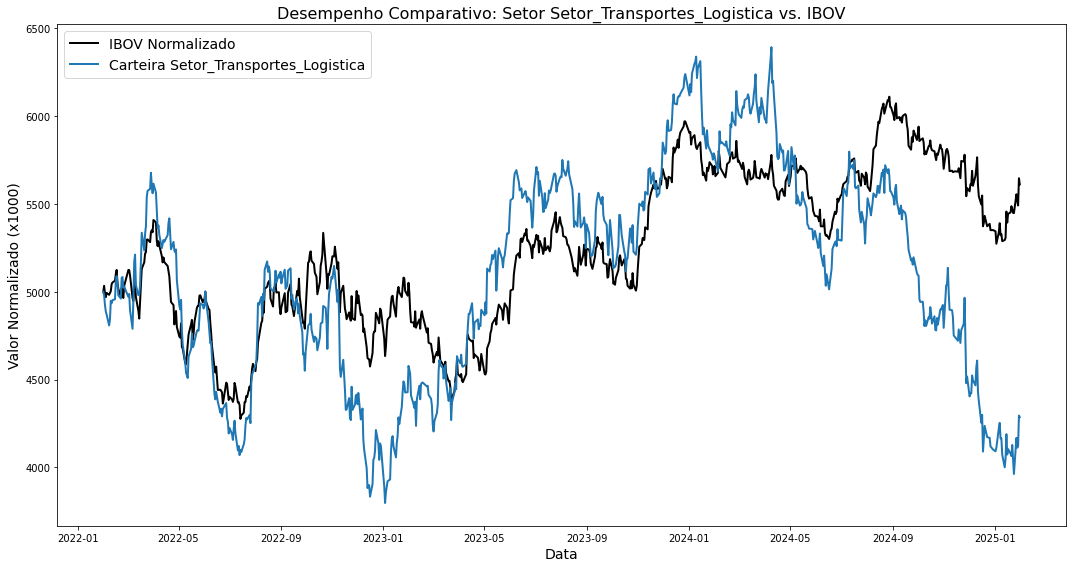

In [445]:
# Loop para plotar os gráficos comparativos para cada carteira
for setor, carteira_normalizada in dados_setores_normalizados.items():
    plt.figure(figsize=(15, 8))
    plt.title(f"Desempenho Comparativo: Setor {setor} vs. IBOV", fontsize=16)  # Aumenta o tamanho da fonte do título

    # Plot do IBOV normalizado
    plt.plot(IBOV_Normalizado.index, IBOV_Normalizado, label="IBOV Normalizado", color="black", linewidth=2)

    # Plot do valor da carteira normalizada para o setor atual
    plt.plot(carteira_normalizada.index, carteira_normalizada['Valor'], label=f"Carteira {setor}", linewidth=2)

    plt.xlabel("Data", fontsize=14)  # Aumenta o tamanho da fonte do rótulo do eixo x
    plt.ylabel("Valor Normalizado (x1000)", fontsize=14)  # Aumenta o tamanho da fonte do rótulo do eixo y
    plt.legend(fontsize=14)  # Aumenta o tamanho da fonte da legenda
    plt.grid(False)  # Remove as linhas de grade
    plt.tight_layout()
    plt.show()